# üì∞ Ïñ¥Î¶∞Ïù¥ Îâ¥Ïä§ EDA

## 1. import

In [86]:
import os
import numpy as np
import pandas as pd
#import spacy # ÌïúÍµ≠Ïñ¥ ÏßÄÏõê ÏïàÌï®
import re
import string
import math
from wordcloud import WordCloud
from textwrap import wrap
from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


sns.set(font="AppleGothic",
        rc={"axes.unicode_minus":False},
        style='whitegrid')

%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

## 2. Load the dataset

In [87]:
df = pd.read_csv('./kid_news.csv', index_col=[0])

## 3. Look at the dataset

In [88]:
df.head()

news_title          news_subtitle  \
0                [ÏÑ∏ÏÉÅ ÏÜçÏúºÎ°ú] "Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥Îäî Ïïà Îê©ÎãàÎã§"  Íµ≠Ï†úÍ≥†ÏñëÏù¥Ïó∞Îßπ, 'ÏõîÎìú Ï∫£ Ïáº'ÏÑú Ìá¥Ï∂ú   
1  [Îâ¥Ïä§ÌÉêÌóòÎåÄ] ÌôÄÎ°ú 1000„éû‚Ä¶ Ïö∞ÌÅ¨Îùº ÂúãÂ¢É<Íµ≠Í≤Ω> ÌÉàÏ∂úÌïú 11ÏÑ∏ ÏÜåÎÖÑ                    NaN   
2         [Îâ¥Ïä§ÌÉêÌóòÎåÄ] Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ 'ÎãàÏºà¬∑ÎÇ©Ìà¨ÏÑ±Ïù¥ Ïû•Ïã†Íµ¨' Ï£ºÏùò                    NaN   
3      [Îâ¥Ïä§ÌÉêÌóòÎåÄ] "ÏΩîÎ°úÎÇòÏóê Í∞ïÌïú ÌòàÏï°Ìòï ÏûàÎã§"‚Ä¶ OÌòï, ÏúÑÌóò ÏµúÏ†Ä                    NaN   
4              Ïû°ÌûàÏßÄ ÏïäÎäî ÁÅ´È≠î<ÌôîÎßà>‚Ä¶ Î¨∏ÌôîÏû¨ Îì± ÎåÄÍ∑úÎ™® ÌîºÌï¥      ÏÑúÏö∏ Î©¥Ï†Å 4Î∂ÑÏùò 1 Ïù¥ÏÉÅ Î∂àÌÉÄ   

                                        news_article  \
0  Ï†Ñ ÏÑ∏Í≥ÑÍ∞Ä Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ïπ®Í≥µ(‰æµÊîª)Ìïú Îü¨ÏãúÏïÑÏóê Í∞ÅÏ¢Ö Ï†úÏû¨Î•º Í∞ÄÌïòÍ≥† ÏûàÎã§. Ïù¥Ïóê Îü¨Ïãú...   
1  Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÏÜåÎÖÑÏù¥ ÌôÄÎ°ú Íµ≠Í≤Ω(ÂúãÂ¢É)ÏùÑ ÎÑòÏùÄ Î≠âÌÅ¥Ìïú Ïó∞Ïù¥ Ï†ÑÌï¥Ï°åÎã§. ÏòÅÍµ≠ Îß§Ï≤¥ Í∞ÄÎîîÏñ∏...   
2  Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ÏóêÏÑú 'Î¨¥(ÁÑ°)ÏïåÎü¨ÏßÄ' 'Î¨¥ÎãàÏºà ÎèÑÍ∏à' Îì±ÏúºÎ°ú ÌôçÎ≥¥¬∑ÌåêÎß§ÎêòÎäî Ïï°ÏÑ∏ÏÑúÎ¶¨Ïóê...   
3  ÌòàÏï°ÌòïÏù¥ OÌòï(Âûã)Ïù∏ ÎûåÏù¥ ÏΩîÎ°úÎÇò Î∞îÏù¥Îü¨Ïä§ Í∞êÏóº Ïãú Îßù¬∑ÏúÑÏ§ëÏ¶ù ÏúÑÌóòÏù¥ Îã§Î•∏ ÌòàÏï°ÌòïÎ≥¥...   
4  ÏµúÍ∑º Î∞úÏÉùÌïú ÎèôÌï¥Ïïà ÏßÄÏó≠ ÎåÄÍ∑úÎ™® ÏÇ∞Î∂àÎ°ú Ïù∏Ìï¥ ÎßâÎåÄÌïú ÏÇ∞Î¶º(Â±±Êûó) ÌîºÌï¥Í∞Ä Ïö∞Î†§ÎêòÍ≥† Ïûà...   

                                            news_url  
0  http://kid.chosun.com/site/data/html_dir/2022/...  
1  http://kid.chosun.com/site/data/html_dir/2022/...  
2  http://kid.chosun.com/site/data/html_dir/2022/...  
3  http://kid.chosun.com/site/data/html_dir/2022/...  
4  http://kid.chosun.com/site/data/html_dir/2022/...

In [89]:
df.iloc[:, :3]

news_title          news_subtitle  \
0                   [ÏÑ∏ÏÉÅ ÏÜçÏúºÎ°ú] "Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥Îäî Ïïà Îê©ÎãàÎã§"  Íµ≠Ï†úÍ≥†ÏñëÏù¥Ïó∞Îßπ, 'ÏõîÎìú Ï∫£ Ïáº'ÏÑú Ìá¥Ï∂ú   
1     [Îâ¥Ïä§ÌÉêÌóòÎåÄ] ÌôÄÎ°ú 1000„éû‚Ä¶ Ïö∞ÌÅ¨Îùº ÂúãÂ¢É<Íµ≠Í≤Ω> ÌÉàÏ∂úÌïú 11ÏÑ∏ ÏÜåÎÖÑ                    NaN   
2            [Îâ¥Ïä§ÌÉêÌóòÎåÄ] Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ 'ÎãàÏºà¬∑ÎÇ©Ìà¨ÏÑ±Ïù¥ Ïû•Ïã†Íµ¨' Ï£ºÏùò                    NaN   
3         [Îâ¥Ïä§ÌÉêÌóòÎåÄ] "ÏΩîÎ°úÎÇòÏóê Í∞ïÌïú ÌòàÏï°Ìòï ÏûàÎã§"‚Ä¶ OÌòï, ÏúÑÌóò ÏµúÏ†Ä                    NaN   
4                 Ïû°ÌûàÏßÄ ÏïäÎäî ÁÅ´È≠î<ÌôîÎßà>‚Ä¶ Î¨∏ÌôîÏû¨ Îì± ÎåÄÍ∑úÎ™® ÌîºÌï¥      ÏÑúÏö∏ Î©¥Ï†Å 4Î∂ÑÏùò 1 Ïù¥ÏÉÅ Î∂àÌÉÄ   
...                                       ...                    ...   
1670      ÎèºÏßÄ ÎáåÏóê Ïª¥Ìì®ÌÑ∞ Ïπ© Ïó∞Í≤∞‚Ä¶ ÏÉùÍ∞ÅÎßåÏúºÎ°ú Í∏∞Í≥Ñ ÏõÄÏßÅÏùº Ïàò ÏûàÏùÑÍπå?                    NaN   
1671               ÌÉëÏäπÌòï Î°úÎ¥á 'ÌîÑÎ°úÏä§ÌÖåÏãúÏä§' Ï°∞Ï¢ÖÏÇ¨Î•º ÎΩëÏäµÎãàÎã§!                    NaN   
1672                Î™®Ìóò Îñ†ÎÇ† Ï§ÄÎπÑ ÎêêÎãà? Í∑∏Îüº, Ï±ÖÏû•ÏùÑ ÌéºÏ≥êÎ¥ê!                    NaN   
1673                 Î∞©ÌÉÑÏÜåÎÖÑÎã®¬∑Î∏îÎûôÌïëÌÅ¨, ÏÑ∏Í≥Ñ ÏùåÏõêÏãúÏû• 'Ïò¨ÌÇ¨'                    NaN   
1674             ÏïåÌååÍ≥†Í∞Ä Ïù¥ÏÑ∏Îèå 9Îã®ÏùÑ Ïù¥Í∏¥ Í±¥ 'Îî•Îü¨Îãù' ÎçïÎ∂ÑÏù¥ÏßÄ                    NaN   

                                           news_article  
0     Ï†Ñ ÏÑ∏Í≥ÑÍ∞Ä Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ïπ®Í≥µ(‰æµÊîª)Ìïú Îü¨ÏãúÏïÑÏóê Í∞ÅÏ¢Ö Ï†úÏû¨Î•º Í∞ÄÌïòÍ≥† ÏûàÎã§. Ïù¥Ïóê Îü¨Ïãú...  
1     Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÏÜåÎÖÑÏù¥ ÌôÄÎ°ú Íµ≠Í≤Ω(ÂúãÂ¢É)ÏùÑ ÎÑòÏùÄ Î≠âÌÅ¥Ìïú Ïó∞Ïù¥ Ï†ÑÌï¥Ï°åÎã§. ÏòÅÍµ≠ Îß§Ï≤¥ Í∞ÄÎîîÏñ∏...  
2     Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ÏóêÏÑú 'Î¨¥(ÁÑ°)ÏïåÎü¨ÏßÄ' 'Î¨¥ÎãàÏºà ÎèÑÍ∏à' Îì±ÏúºÎ°ú ÌôçÎ≥¥¬∑ÌåêÎß§ÎêòÎäî Ïï°ÏÑ∏ÏÑúÎ¶¨Ïóê...  
3     ÌòàÏï°ÌòïÏù¥ OÌòï(Âûã)Ïù∏ ÎûåÏù¥ ÏΩîÎ°úÎÇò Î∞îÏù¥Îü¨Ïä§ Í∞êÏóº Ïãú Îßù¬∑ÏúÑÏ§ëÏ¶ù ÏúÑÌóòÏù¥ Îã§Î•∏ ÌòàÏï°ÌòïÎ≥¥...  
4     ÏµúÍ∑º Î∞úÏÉùÌïú ÎèôÌï¥Ïïà ÏßÄÏó≠ ÎåÄÍ∑úÎ™® ÏÇ∞Î∂àÎ°ú Ïù∏Ìï¥ ÎßâÎåÄÌïú ÏÇ∞Î¶º(Â±±Êûó) ÌîºÌï¥Í∞Ä Ïö∞Î†§ÎêòÍ≥† Ïûà...  
...                                                 ...  
1670  Î®∏Ïä§ÌÅ¨, Ïú†ÌäúÎ∏åÏóê Ïã§Ìóò ÎèºÏßÄ 'Í±∞Ìä∏Î£®Îìú' Í≥µÍ∞ú "Îáå ÏßàÌôò ÏπòÎ£å ÎèÑÏõÄ‚Ä¶ Ïò¨Ìï¥ ÏïàÏóê Îûå...  
1671  ÎûåÏùò ÌåîÎã§Î¶¨Ïóê Ïó∞Í≤∞Ìï¥ Ï°∞Ï¢Ö "Î°úÎ¥á ÌôúÏö©Ìïú Í≤ΩÏ£º Ïä§Ìè¨Ï∏† ÎßåÎì§ Í≤É" ÎûåÏù¥ ÌÉëÏäπÌïú Î°úÎ¥áÎÅº...  
1672  ÎùµÎò•! ÏÑ†Î¨ºÏù¥ ÎèÑÏ∞©ÌñàÏäµÎãàÎã§. ÌåêÌÉÄÏßÄ ÏÜåÏÑ§ 'Ìï¥Î¶¨Ìè¨ÌÑ∞'Ïùò ÏûëÍ∞Ä Ï°∞Ïï§ Î°§ÎßÅ(55¬∑ÏòÅÍµ≠)...  
1673  ÏïÑÏù¥Îèå Í∑∏Î£π Î∞©ÌÉÑÏÜåÎÖÑÎã®(BTS)Í≥º Î∏îÎûôÌïëÌÅ¨Í∞Ä ÏÑ∏Í≥Ñ Î¨¥ÎåÄÎ•º Îí§ÌùîÎì§Í≥† ÏûàÎã§. Í∏ÄÎ°úÎ≤å Ïãú...  
1674  'Ïù∏Í≥µ ÏßÄÎä• Ïùò'Í∞Ä ÏûàÎäî Î≥ëÏõêÏùÑ ÏÉÅÏÉÅÌïú Ï†Å ÏûàÎãà? ÎÜÄÎûçÍ≤åÎèÑ Î≤åÏç® Ïö∞Î¶¨ÎÇòÎùº Ìïú Î≥ëÏõêÏóê...  

[1675 rows x 3 columns]

In [7]:
print(list(df.columns))
print(df.shape)

['news_title', 'news_subtitle', 'news_article', 'news_url']
(1675, 4)


In [8]:
# Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥Î•º ÌôïÏù∏
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 0 to 1674
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   news_title     1675 non-null   object
 1   news_subtitle  403 non-null    object
 2   news_article   1636 non-null   object
 3   news_url       1675 non-null   object
dtypes: object(4)
memory usage: 65.4+ KB


---

## 4. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨(Data Preprocessing)

### Í≤∞Ï∏°Ïπò ÌôïÏù∏

In [9]:
# Í≤∞Ï∏°Í∞í ÌôïÏù∏
df.isnull().sum()

news_title          0
news_subtitle    1272
news_article       39
news_url            0
dtype: int64

In [10]:
df = df.fillna("")

In [11]:
# Í≤∞Ï∏°Í∞í ÌôïÏù∏
df.isna().sum()

news_title       0
news_subtitle    0
news_article     0
news_url         0
dtype: int64

---

### Î¨∏ÏûêÏó¥ Í∏∏Ïù¥ ÌôïÏù∏ Î∞è Ï∂îÍ∞Ä

In [12]:
df['news_len'] = df['news_article'].apply(lambda x: len(x))

In [13]:
df.head()

news_title          news_subtitle  \
0                [ÏÑ∏ÏÉÅ ÏÜçÏúºÎ°ú] "Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥Îäî Ïïà Îê©ÎãàÎã§"  Íµ≠Ï†úÍ≥†ÏñëÏù¥Ïó∞Îßπ, 'ÏõîÎìú Ï∫£ Ïáº'ÏÑú Ìá¥Ï∂ú   
1  [Îâ¥Ïä§ÌÉêÌóòÎåÄ] ÌôÄÎ°ú 1000„éû‚Ä¶ Ïö∞ÌÅ¨Îùº ÂúãÂ¢É<Íµ≠Í≤Ω> ÌÉàÏ∂úÌïú 11ÏÑ∏ ÏÜåÎÖÑ                          
2         [Îâ¥Ïä§ÌÉêÌóòÎåÄ] Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ 'ÎãàÏºà¬∑ÎÇ©Ìà¨ÏÑ±Ïù¥ Ïû•Ïã†Íµ¨' Ï£ºÏùò                          
3      [Îâ¥Ïä§ÌÉêÌóòÎåÄ] "ÏΩîÎ°úÎÇòÏóê Í∞ïÌïú ÌòàÏï°Ìòï ÏûàÎã§"‚Ä¶ OÌòï, ÏúÑÌóò ÏµúÏ†Ä                          
4              Ïû°ÌûàÏßÄ ÏïäÎäî ÁÅ´È≠î<ÌôîÎßà>‚Ä¶ Î¨∏ÌôîÏû¨ Îì± ÎåÄÍ∑úÎ™® ÌîºÌï¥      ÏÑúÏö∏ Î©¥Ï†Å 4Î∂ÑÏùò 1 Ïù¥ÏÉÅ Î∂àÌÉÄ   

                                        news_article  \
0  Ï†Ñ ÏÑ∏Í≥ÑÍ∞Ä Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ïπ®Í≥µ(‰æµÊîª)Ìïú Îü¨ÏãúÏïÑÏóê Í∞ÅÏ¢Ö Ï†úÏû¨Î•º Í∞ÄÌïòÍ≥† ÏûàÎã§. Ïù¥Ïóê Îü¨Ïãú...   
1  Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÏÜåÎÖÑÏù¥ ÌôÄÎ°ú Íµ≠Í≤Ω(ÂúãÂ¢É)ÏùÑ ÎÑòÏùÄ Î≠âÌÅ¥Ìïú Ïó∞Ïù¥ Ï†ÑÌï¥Ï°åÎã§. ÏòÅÍµ≠ Îß§Ï≤¥ Í∞ÄÎîîÏñ∏...   
2  Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ÏóêÏÑú 'Î¨¥(ÁÑ°)ÏïåÎü¨ÏßÄ' 'Î¨¥ÎãàÏºà ÎèÑÍ∏à' Îì±ÏúºÎ°ú ÌôçÎ≥¥¬∑ÌåêÎß§ÎêòÎäî Ïï°ÏÑ∏ÏÑúÎ¶¨Ïóê...   
3  ÌòàÏï°ÌòïÏù¥ OÌòï(Âûã)Ïù∏ ÎûåÏù¥ ÏΩîÎ°úÎÇò Î∞îÏù¥Îü¨Ïä§ Í∞êÏóº Ïãú Îßù¬∑ÏúÑÏ§ëÏ¶ù ÏúÑÌóòÏù¥ Îã§Î•∏ ÌòàÏï°ÌòïÎ≥¥...   
4  ÏµúÍ∑º Î∞úÏÉùÌïú ÎèôÌï¥Ïïà ÏßÄÏó≠ ÎåÄÍ∑úÎ™® ÏÇ∞Î∂àÎ°ú Ïù∏Ìï¥ ÎßâÎåÄÌïú ÏÇ∞Î¶º(Â±±Êûó) ÌîºÌï¥Í∞Ä Ïö∞Î†§ÎêòÍ≥† Ïûà...   

                                            news_url  news_len  
0  http://kid.chosun.com/site/data/html_dir/2022/...       469  
1  http://kid.chosun.com/site/data/html_dir/2022/...       380  
2  http://kid.chosun.com/site/data/html_dir/2022/...       446  
3  http://kid.chosun.com/site/data/html_dir/2022/...       451  
4  http://kid.chosun.com/site/data/html_dir/2022/...       620

In [14]:
# min Í∞íÏùÑ Î¥§ÏùÑ Îïå Í∏∞ÏÇ¨Í∞Ä ÏóÜÎäî Í≤ΩÏö∞ÎèÑ Ï°¥Ïû¨
df.describe().T

count        mean         std  min    25%    50%     75%     max
news_len  1675.0  981.068657  724.715977  0.0  479.0  772.0  1221.0  9658.0

---

### Ïù¥ÏÉÅÏπò ÌôïÏù∏
- Ïù¥ÏÉÅÌïú Îâ¥Ïä§ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [15]:
# Í∏∞ÏÇ¨ Í∏∏Ïù¥ 200 Ïù¥Ìïò ÌôïÏù∏
condition = (df.news_len <= 200)

shorts_df = df[condition][['news_title','news_url','news_len']].sort_values(by='news_len' ,ascending=True)
shorts_df

news_title  \
8                                   [Î©îÏãúÏßÄ Îâ¥Ïä§] Î™ÖÌÉú¬∑ÎåÄÍ≤åÏôÄ Îü¨ÏãúÏïÑ   
303                                     [Î©îÏãúÏßÄ Îâ¥Ïä§] ÎèôÏßÄ(ÂÜ¨Ëá≥)   
325                                  [Î©îÏãúÏßÄ Îâ¥Ïä§] ÏÑ±ÌÉÑ Ìä∏Î¶¨Ïùò Í∏∞Ïõê   
389                                   [Î©îÏãúÏßÄ Îâ¥Ïä§] ÏùºÎ≥∏ ÌïúÎ•ò Ïó¥Ìíç   
400                                    [Î©îÏãúÏßÄ Îâ¥Ïä§] Ïö∞Ï£ºÌÉêÏÇ¨ Ïù∏Ìòï   
423                                  [Î©îÏãúÏßÄ Îâ¥Ïä§] ÎåÄÌïôÏàòÌïô Îä•Î†•ÏãúÌóò   
451                                      [Î©îÏãúÏßÄ Îâ¥Ïä§] COP26   
485                                [Î©îÏãúÏßÄ Îâ¥Ïä§] Í∏∞Ï¥à ÌïôÎ†•Í≥º ÌïôÍµêÏÉùÌôú   
504                                     [Î©îÏãúÏßÄ Îâ¥Ïä§] ÎåÄÌÜµÎ†π ÏÑ†Í±∞   
536                                       [Î©îÏãúÏßÄ Îâ¥Ïä§] ÌÉÑÏÜåÏ§ëÎ¶Ω   
568                                         [Î©îÏãúÏßÄ Îâ¥Ïä§] Í≥®ÌîÑ   
586                                       [Î©îÏãúÏßÄ Îâ¥Ïä§] Íµ≠Ï†ïÍ∞êÏÇ¨   
612                                       [Î©îÏãúÏßÄ Îâ¥Ïä§] Í∏∞ÎÑ§Ïä§Î∂Å   
644                                         [Î©îÏãúÏßÄ Îâ¥Ïä§] Ï∂îÏÑù   
671                                     [Î©îÏãúÏßÄ Îâ¥Ïä§] ÏïÑÌîÑÍ∞Ñ Ï†ÑÏüÅ   
697                                     [Î©îÏãúÏßÄ Îâ¥Ïä§] ÏΩîÎ°úÎÇò Î∞±Ïã†   
1383                   [ÏöîÎ¶¨ Ïø°! Ï°∞Î¶¨ Ïø°!] ÏãúÏõêÌïòÍ≥† Îã¨ÏΩ§ÌïòÍ≥† ÏΩîÏΩîÏïÑ ÏïÑÏù¥Ïä§Î∞î   
1409                [ÏöîÎ¶¨ Ïø°! Ï°∞Î¶¨ Ïø°!] Ìò∏Ìò∏ Î∂àÏñ¥ ÎìúÏÑ∏Ïöî ÎèåÎèå ÎßêÎ¶∞ Ï±ÑÏÜå Ï∂òÍ∂å   
1413             [ÏöîÎ¶¨ Ïø°! Ï°∞Î¶¨ Ïø°!] ÏΩïÏΩï Ï∞çÏñ¥ ÏûÖÏúºÎ°ú ÏèôÏèô ÌÜ°ÌÜ° ÌäÄÎäî ÌåùÏΩò ÏπòÌÇ®   
1438              [ÏöîÎ¶¨ Ïø°! Ï°∞Î¶¨ Ïø°!] ÌååÌã∞ ÏùåÏãùÏúºÎ°úÎèÑ 'OK' ÌÜ†ÎßàÌÜ† Î∏åÎ£®Ïä§ÏºÄÌÉÄ   
275                                  [Î©îÏãúÏßÄ Îâ¥Ïä§] ÏÑ∏Í≥ÑÏùò ÏÉàÌï¥ ÌíçÏäµ   
244                                  [Î©îÏãúÏßÄ Îâ¥Ïä§] ÏÑ±ÎÖÑ(ÊàêÂπ¥) Í∏∞Ï§Ä   
1654                                            Í∏∞ÏûêÎì§Ïùò ÏàòÎã§   
205                       [ÏòÅÏÉÅ-ÎßõÏûàÎäî Ïã§ÌóòÏã§] Í∞êÏûêÏ±Ñ ÌîºÏûêÎ•º ÎßåÎì§Ïñ¥ Î¥§Ïñ¥Ïöî‚Äº   
37                                          [Î©îÏãúÏßÄ Îâ¥Ïä§] Ï≤¥Ïä§   
69                                  [Î©îÏãúÏßÄ Îâ¥Ïä§] Ïö©Í∞êÌïòÍ≤å ÏßàÎ¨∏ÌïòÍ∏∞!   
214                                   [Î©îÏãúÏßÄ Îâ¥Ïä§] Ïñ¥Î¶∞Ïù¥ ÍµêÌÜµÏïàÏ†Ñ   
108                   [ÍøÄbeetv] ÏïàÏ≤†Ïàò ÌõÑÎ≥¥Ïùò 'Ïñ¥Î¶∞Ïù¥Î•º ÏúÑÌïú ÎåÄÏÑ†Í≥µÏïΩ'ÏùÄ?   
109              [ÍøÄbeetv] Ïñ¥Î¶∞Ïù¥Ï°∞ÏÑ†ÏùºÎ≥¥ Í∏∞ÏûêÎì§Ïùò Ìï¥Î≥¥GO! "Î≥ÑÍ±∏ Îã§ Íæ∏Î©∞Ïöî"   
111                                [Î©îÏãúÏßÄ Îâ¥Ïä§] ÌïúÍµ≠Ìåê ÎØ∏ÎÑ§Î•¥Î∞î Â§ßÂ≠∏   
120                        [ÍøÄBEE] Í∞ïÏïÑÏßÄ Í±¥Í∞ïÏóê ÏµúÍ≥†Ïù∏ ÏàòÏ†ú Í∞ÑÏãù ÎßåÎì§Í∏∞   
125             [Ïã†ÏûêÏòÅÏùò 5Î∂Ñ ÏòÅÏñ¥] Î™®Îãà Î™®Îãà ÏÑùÍ∞ÄÎ™®Îãà ÏùºÌôî ÏÜç ÏòÅÏñ¥ ÌëúÌòÑ Î∞∞Ïö∞Í∏∞!   
126                    [ÏùºÏÉÅ ÏÜç Í∞ÑÎã®Ìïú Ïö¥Îèô] Î≥∏ÏßÄ Í∏∞ÏûêÎì§, Ïä§Ìä∏Î†àÏπ≠Ïóê ÎèÑÏ†ÑÌïòÎã§   
92                                     [Î©îÏãúÏßÄ Îâ¥Ïä§] Ïò¨Î∞îÎ•∏ ÏñëÏπòÎ≤ï   
164                               [Î©îÏãúÏßÄ Îâ¥Ïä§] Ïñ¥Î¶∞Ïù¥ ÏïàÏ†Ñ Í¥ÄÎ¶¨ Í∞ïÌôî   
203                      [ÏòÅÏÉÅ-Ï∂úÎèô! Î™ÖÏòàÍ∏∞Ïûê] Íµ≠Î¶ΩÍ≥ºÌïôÏàòÏÇ¨Ïó∞Íµ¨ÏõêÏùÑ Ï≤¥ÌóòÌïòÎã§!   
144            [ÏòÅÏÉÅ-Ï∂úÎèô! Î™ÖÏòàÍ∏∞Ïûê] ÌôîÏ†úÏùò Ïù∏Î¨º Í∏Ä Ïì∞Îäî ÏùòÏÇ¨ 'ÎÇ®Í∂ÅÏù∏'ÏùÑ ÎßåÎÇòÎã§!   
187                              [Î©îÏãúÏßÄ Îâ¥Ïä§] Ïû¨Î∞åÎäî ÏßÄÌïòÏ≤†Ïó≠Î™Ö Ïù¥ÏïºÍ∏∞   
202            [ÏòÅÏÉÅ-Ï∂úÎèô! Î™ÖÏòàÍ∏∞Ïûê] ÏÉàÎ≤ΩÎ∞∞ÏÜ° ÏáºÌïëÎ™∞ 'ÎßàÏºìÏª¨Î¶¨' ÍπÄÏä¨ÏïÑ ÎåÄÌëú Ïù∏ÌÑ∞Î∑∞   
706                         [ÏÉùÏÉù~~ÏòÅÏÉÅÎâ¥Ïä§] Î®∏Î¶¨Ïóê Î∞•ÏÜ• Îã¨Î¶∞ Î°úÎ¥á Ïù¥ÏïºÍ∏∞   
368               [ÏÉùÏÉù Ïù∏ÌÑ∞Î∑∞ ÌòÑÏû•!] Ï£ºÌïú ÌîÑÎûëÏä§ ÎåÄÏÇ¨ 'ÌïÑÎ¶Ω Î•¥Ìè¨Î•¥'Î•º ÎßåÎÇòÎã§!   
691                            [ÏÉùÏÉù~~ÏòÅÏÉÅÎâ¥Ïä§] ÌôòÍ≤ΩÌååÍ¥¥Ïùò Ï£ºÎ≤î ÎàÑÌÖîÎùº?   
717                        Ïû†ÏûêÎ¶¨ ÎìúÎ°†Í≥º ÌíçÏÑ† ÎßùÏõêÍ≤Ω? Í≥ºÍ∞êÌïú Î∞ïÏÉàÏùò ÏÇ¨Ïó∞ÏùÄ?   
825   [ÎèôÏòÅÏÉÅ]"ÎãàÎÑ§ ÏßëÏóê ÏöîÎ¶¨Î°úÎ¥á ÏûàÏñ¥? ÎπÑÏÑúÎ°úÎ¥áÏùÄ?"..."Î°úÎ¥á Î™á ÎåÄ ÏûàÎãà?" Î¨ªÎäî...   
289                            [Ï†ïÎãµ Í≥µÍ∞ú] ÌÅ¨Î¶¨Ïä§ÎßàÏä§ ÌçºÏ

In [16]:
shorts_df.shape

(60, 3)

In [17]:
short_title = shorts_df.news_title
list(short_title)

['[Î©îÏãúÏßÄ Îâ¥Ïä§] Î™ÖÌÉú¬∑ÎåÄÍ≤åÏôÄ Îü¨ÏãúÏïÑ',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] ÎèôÏßÄ(ÂÜ¨Ëá≥)',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] ÏÑ±ÌÉÑ Ìä∏Î¶¨Ïùò Í∏∞Ïõê',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] ÏùºÎ≥∏ ÌïúÎ•ò Ïó¥Ìíç',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] Ïö∞Ï£ºÌÉêÏÇ¨ Ïù∏Ìòï',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] ÎåÄÌïôÏàòÌïô Îä•Î†•ÏãúÌóò',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] COP26',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] Í∏∞Ï¥à ÌïôÎ†•Í≥º ÌïôÍµêÏÉùÌôú',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] ÎåÄÌÜµÎ†π ÏÑ†Í±∞',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] ÌÉÑÏÜåÏ§ëÎ¶Ω',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] Í≥®ÌîÑ',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] Íµ≠Ï†ïÍ∞êÏÇ¨',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] Í∏∞ÎÑ§Ïä§Î∂Å',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] Ï∂îÏÑù',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] ÏïÑÌîÑÍ∞Ñ Ï†ÑÏüÅ',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] ÏΩîÎ°úÎÇò Î∞±Ïã†',
 '[ÏöîÎ¶¨ Ïø°! Ï°∞Î¶¨ Ïø°!] ÏãúÏõêÌïòÍ≥† Îã¨ÏΩ§ÌïòÍ≥† ÏΩîÏΩîÏïÑ ÏïÑÏù¥Ïä§Î∞î',
 '[ÏöîÎ¶¨ Ïø°! Ï°∞Î¶¨ Ïø°!] Ìò∏Ìò∏ Î∂àÏñ¥ ÎìúÏÑ∏Ïöî ÎèåÎèå ÎßêÎ¶∞ Ï±ÑÏÜå Ï∂òÍ∂å',
 '[ÏöîÎ¶¨ Ïø°! Ï°∞Î¶¨ Ïø°!] ÏΩïÏΩï Ï∞çÏñ¥ ÏûÖÏúºÎ°ú ÏèôÏèô ÌÜ°ÌÜ° ÌäÄÎäî ÌåùÏΩò ÏπòÌÇ®',
 "[ÏöîÎ¶¨ Ïø°! Ï°∞Î¶¨ Ïø°!] ÌååÌã∞ ÏùåÏãùÏúºÎ°úÎèÑ 'OK' ÌÜ†ÎßàÌÜ† Î∏åÎ£®Ïä§ÏºÄÌÉÄ",
 '[Î©îÏãúÏßÄ Îâ¥Ïä§] ÏÑ∏

---

### Îç∞Ïù¥ÌÑ∞ ÏÇ≠Ï†ú
- ÏãúÎ¶¨Ï¶à Í∏∞ÏÇ¨ titleÍ≥º Í∑∏ Ïô∏ text title ÌôïÏù∏

In [18]:
# Ï†ÑÏ≤¥ Í∏∞ÏÇ¨ ÎåÄÏÉÅ ÏßÑÌñâ
split_title = []

for title in df.news_title:
    # m = re.search(r'(?<=\[).*(?=\])', title)
    m = re.search(r'\[(.*?)\]', title)
    if m :
        split_title.append(m.group())
    else:
        # sub_text = re.sub(r'[?]',"\?",title)
        split_title.append(title)

In [19]:
df['split_title'] = split_title

In [20]:
df[['split_title']][:10]

split_title
0                     [ÏÑ∏ÏÉÅ ÏÜçÏúºÎ°ú]
1                      [Îâ¥Ïä§ÌÉêÌóòÎåÄ]
2                      [Îâ¥Ïä§ÌÉêÌóòÎåÄ]
3                      [Îâ¥Ïä§ÌÉêÌóòÎåÄ]
4  Ïû°ÌûàÏßÄ ÏïäÎäî ÁÅ´È≠î<ÌôîÎßà>‚Ä¶ Î¨∏ÌôîÏû¨ Îì± ÎåÄÍ∑úÎ™® ÌîºÌï¥
5                      [Îâ¥Ïä§ÌÉêÌóòÎåÄ]
6        [Ïö∞Î¶¨Ïùò Î≥¥Í∏àÏûêÎ¶¨, ÎÜÄÎùºÏö¥ ‰ΩèÂ±Ö ÏÉÅÏãù]
7                  [Ï£ºÎ™©! Ï†ïÎ≥¥ Î†àÌÑ∞]
8                     [Î©îÏãúÏßÄ Îâ¥Ïä§]
9                      [Îâ¥Ïä§ÌÉêÌóòÎåÄ]

In [21]:
# ÏãúÎ¶¨Ï¶à Í∏∞ÏÇ¨ Ïú†ÎãàÌÅ¨ Í∞í Ï≤¥ÌÅ¨
count_unique_title = df.split_title.value_counts()
count_unique_title[count_unique_title >= 2]

[Îâ¥Ïä§ÌÉêÌóòÎåÄ]                  544
[Ïò§ÎäòÏùò ÌÇ§ÏõåÎìú]                 86
Í∏∞ÏûêÎì§Ïùò ÏàòÎã§                   77
[Î©îÏãúÏßÄ Îâ¥Ïä§]                  26
[ÌåùÏΩòÎâ¥Ïä§]                    26
[Ï£ºÎ™©! Ï†ïÎ≥¥ Î†àÌÑ∞]               19
[Ìë∏Î•∏ Î≥Ñ, ÏßÄÍµ¨Î•º ÏßÄÏºúÎùº]           15
[ESG Í∏∞ÏóÖ ÌÉêÎ∞©]               14
[Ïù¥Ïä¨Í∏∞Ïùò Ïä¨Í∏∞Î°úÏö¥ Ïä§ÌÜ†Î¶¨ Ïû°Ïä§]        10
[ÏùòÌïô Ï†ïÎ≥¥ ÏèôÏèô, Ïö∞Î¶¨ ÏïÑÏù¥ Ïë•Ïë•]       9
[Ïó¨Îü¨Î∂ÑÏùò ÏÉùÍ∞ÅÏùÄ?]                8
[Í∏∞Ìöç]                       8
[ÏÇ¨ÏßÑÏúºÎ°ú Î≥¥Îäî ÏÑ∏ÏÉÅ]               7
[ÏïåÏ∞®Í≥† ÌÜµÌÜµÌäÄÎäî Ïù∏ÌÑ∞Î∑∞]             7
[ÌòÑÏû•]                       5
[Ìò∏Íµ≠ Î≥¥ÌõàÏùò Îã¨ ÌäπÏßë]              5
[Í∏∞Ïûê ÏàòÏ≤©]                    5
[Ï∂úÎèô! Î™ÖÏòàÍ∏∞Ïûê]                 4
[ÌÉÑÏÜå Ï§ëÎ¶Ω Í∏∞Ìöç]                 4
[ÏöîÎ¶¨ Ïø°! Ï°∞Î¶¨ Ïø°!]              4
[ÏÑ∏ÏÉÅ ÏÜçÏúºÎ°ú]                   4
[Ï¥àÎì± Ìä∏Î†åÎìú]                   4
[ÍøÄBeeTV]                   4
[ÏïåÎ¶ΩÎãàÎã§]                     3
[ÏòÅÏÉÅ-Ï∂úÎèô! 

In [22]:
# 200Ï§Ñ Ïù¥Ìïò Í∏∞ÏÇ¨ ÎåÄÏÉÅ ÏßÑÌñâ
import re

split_title = []

for title in short_title:
    m = re.search(r'\[(.*?)\]', title)
    if m :
        split_title.append(m.group())
    else:
        split_title.append(title)

In [23]:
list(set(split_title))

['ÎÖ∏Î¶áÌïòÍ≤å Íµ¨ÏõåÎ≥ºÍπå? Ìè≠Ïã†Ìè≠Ïã† Ìå¨ÏºÄÏù¥ÌÅ¨',
 'ÎèåÎèå ÎßêÎ†∏ÎÑ§! ÎßõÏûàÎäî ÏãúÍ∏àÏπò Î°§',
 '[ÏöîÎ¶¨ Ïø°! Ï°∞Î¶¨ Ïø°!]',
 "Ìé∏ÌïòÍ≤å Îì§Í≥† 'ÏèôÏèô' ÌïúÏûÖ ÌÜ†Ïä§Ìä∏ Íº¨Ïπò",
 'Ïû†ÏûêÎ¶¨ ÎìúÎ°†Í≥º ÌíçÏÑ† ÎßùÏõêÍ≤Ω? Í≥ºÍ∞êÌïú Î∞ïÏÉàÏùò ÏÇ¨Ïó∞ÏùÄ?',
 'Í∏∞Î°ù, Îòê Í∏∞Î°ù‚Ä¶ ÏºÄÏù¥ÌåùÏóê ÌïúÍ≥ÑÎûÄ ÏóÜÎã§',
 'Ï¥àÏΩúÎ¶ø Ïûº ÌíàÏùÄ Î∞îÎÇòÎÇò ÌÅ¨Î†àÏù¥ÌîÑ',
 '[ÏÉùÏÉù~~ÏòÅÏÉÅÎâ¥Ïä§]',
 '[POPCORN NEWS]',
 '[ÏùºÏÉÅ ÏÜç Í∞ÑÎã®Ìïú Ïö¥Îèô]',
 '[ÍøÄbeetv]',
 '[ÏòÅÏÉÅ-Ï∂úÎèô! Î™ÖÏòàÍ∏∞Ïûê]',
 '[Ï†ïÎãµ Í≥µÍ∞ú]',
 'Í∏∞ÏûêÎì§Ïùò ÏàòÎã§',
 '[ÍøÄBeeTV]',
 '[Ïπ¥ÎìúÎâ¥Ïä§]',
 '[Ïã†ÏûêÏòÅÏùò 5Î∂Ñ ÏòÅÏñ¥]',
 '[ÏÉùÏÉù Ïù∏ÌÑ∞Î∑∞ ÌòÑÏû•!]',
 '[ÍøÄBEE]',
 '[ÏòÅÏÉÅ-ÎßõÏûàÎäî Ïã§ÌóòÏã§]',
 '[Î©îÏãúÏßÄ Îâ¥Ïä§]',
 'Ïã†ÏûêÏòÅÏùò 5Î∂Ñ ÏòÅÏñ¥!',
 'Í∞ÑÌé∏ÌïòÍ≤å Ìïú ÎÅº Ï±ôÍ∏∏ Îïê Ï´ÄÎìùÏ´ÄÎìù Í∑∏ÎûòÎÜÄÎùº Î∞î',
 '[ÎèôÏòÅÏÉÅ]']

In [24]:
# Ï†ÑÏ≤¥ Í∏∞ÏÇ¨Ïóê ÎåÄÌïú Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨Î•º ÏßÑÌñâÌï©ÎãàÎã§
print('Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨ Ï†Ñ df ÌÅ¨Í∏∞:',len(df))

Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨ Ï†Ñ df ÌÅ¨Í∏∞: 1675


In [25]:
for title in split_title:
    # Î∂àÏö©Ïñ¥ Îã®Ïñ¥Í∞Ä news_titleÏóê Ìè¨Ìï®ÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Í±∏Îü¨ÎÉÖÎãàÎã§
    df = df[df['news_title'].apply(lambda x: title not in x)]
    # Í∞ÑÌòπ ÏãúÎ¶¨Ï¶à ÌÉÄÏù¥ÌãÄÏù¥ Í∏∞ÏÇ¨ Î≥∏Î¨∏ ÏïàÏóêÏÑú ÏãúÏûëÌïòÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏäµÎãàÎã§
    df = df[df['news_article'].apply(lambda x: title not in x)]

In [26]:
print('Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨ ÌõÑ df ÌÅ¨Í∏∞:',len(df))

Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨ ÌõÑ df ÌÅ¨Í∏∞: 1538


In [27]:
# Í∏∞ÏÇ¨Ïùò Í∏∏Ïù¥Í∞Ä 300Í∞ú ÏïÑÎûòÏù∏ Í≤ΩÏö∞ Î≤ÑÎ¶º
# Î¨∏Ïû• ÏöîÏïΩÏùÑ ÏúÑÌï¥ ÏÑ∏ Î¨∏Ïû•Î≥¥Îã§ ÎßéÏùÄ Í∏∞ÏÇ¨Î•º ÌôïÎ≥¥ÌïòÍ∏∞ ÏúÑÌï®
df = df[df['news_len'] > 300].reset_index(drop=True)
df.head(2)

news_title          news_subtitle  \
0                [ÏÑ∏ÏÉÅ ÏÜçÏúºÎ°ú] "Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥Îäî Ïïà Îê©ÎãàÎã§"  Íµ≠Ï†úÍ≥†ÏñëÏù¥Ïó∞Îßπ, 'ÏõîÎìú Ï∫£ Ïáº'ÏÑú Ìá¥Ï∂ú   
1  [Îâ¥Ïä§ÌÉêÌóòÎåÄ] ÌôÄÎ°ú 1000„éû‚Ä¶ Ïö∞ÌÅ¨Îùº ÂúãÂ¢É<Íµ≠Í≤Ω> ÌÉàÏ∂úÌïú 11ÏÑ∏ ÏÜåÎÖÑ                          

                                        news_article  \
0  Ï†Ñ ÏÑ∏Í≥ÑÍ∞Ä Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ïπ®Í≥µ(‰æµÊîª)Ìïú Îü¨ÏãúÏïÑÏóê Í∞ÅÏ¢Ö Ï†úÏû¨Î•º Í∞ÄÌïòÍ≥† ÏûàÎã§. Ïù¥Ïóê Îü¨Ïãú...   
1  Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÏÜåÎÖÑÏù¥ ÌôÄÎ°ú Íµ≠Í≤Ω(ÂúãÂ¢É)ÏùÑ ÎÑòÏùÄ Î≠âÌÅ¥Ìïú Ïó∞Ïù¥ Ï†ÑÌï¥Ï°åÎã§. ÏòÅÍµ≠ Îß§Ï≤¥ Í∞ÄÎîîÏñ∏...   

                                            news_url  news_len split_title  
0  http://kid.chosun.com/site/data/html_dir/2022/...       469    [ÏÑ∏ÏÉÅ ÏÜçÏúºÎ°ú]  
1  http://kid.chosun.com/site/data/html_dir/2022/...       380     [Îâ¥Ïä§ÌÉêÌóòÎåÄ]

In [28]:
# Ï¥àÍ∏∞ Îç∞Ïù¥ÌÑ∞ : 1675
print('ÏßßÏùÄ Í∏∞ÏÇ¨ Ï≤òÎ¶¨ ÌõÑ df ÌÅ¨Í∏∞:',len(df))

ÏßßÏùÄ Í∏∞ÏÇ¨ Ï≤òÎ¶¨ ÌõÑ df ÌÅ¨Í∏∞: 1527


---

### ÌäπÏàòÎ¨∏Ïûê Î∞è Í≥µÎ∞± Ï†úÍ±∞

In [29]:
import re 
def clean_text(text): 
    text = re.sub(r'(\[)(.*?)(\])','',str(text)) # remove [title]
    text = re.sub(r'(\()(.*?)(\))', '', text)  # ÏÜåÍ¥ÑÌò∏ (ÏÑ∏Î∂Ä ÏÑ§Î™Ö
    text = re.sub(r'[?!]', '.', text)          # ?! => ÎßàÏπ®Ìëú Ï≤òÎ¶¨
    text = re.sub(r'[\,\¬∑\:\-\_]', ' ', text)  # Î¨∏Ïû•Î∂ÄÌò∏ Íµ¨Î∂ÑÏûê => Í≥µÎ∞± Ï≤òÎ¶¨
    text = text.lower() #lower case 
    text = re.sub(r'\s+', ' ', text) #remove extra space
    # text = re.sub(r'<[^>]+>','',text) #remove Html tags 
    text = re.sub(r'<[^Í∞Ä-Ìû£]+>','',text)# ÌôëÌôîÏÇ¥Í¥ÑÌò∏ => ÌïúÍ∏ÄÎßå ÎπºÍ≥† Ï†úÍ±∞
    text = re.sub(r'^\s+', '', text) #remove space from start
    text = re.sub(r'\s+$', '', text) #remove space from the end
    text = re.sub('[^Í∞Ä-Ìû£\w. ]', '', text)    # ÌïúÍ∏Ä, Î¨∏Ïûê, Ïà´Ïûê, ÎßàÏπ®Ìëú, Í≥µÎ∞± Ï†úÏô∏ Ï†úÍ±∞
    text = re.sub(r'[‰∏Ä-Èæ•]', '', text) #remove Chinese character
    text = re.sub('\s{2,}', ' ', text)        # 2Î≤à Ïù¥ÏÉÅÏùò space Ï†úÍ±∞
    text = text.strip()
    return text

In [30]:
text = ' <p>[ÏÑ∏ÏÉÅ ÏÜçÏúºÎ°ú] <ÌôîÎßà> "Í≥†ÏñëÏù¥? ssP Îü¨ÏãúÏïÑ¬∑Í≥†ÏñëÏù¥(ÏÜåÎßêÎ¶¨¬∑Ïä§ÌïëÌÅ¨Ïä§¬∑Ïò§Î¶¨ÏóîÌÉà Îì±...)Îäî Ïïà  Îê©ÎãàÎã§.ÁÑ° 1m Ïù¥ÏÉÅ Ïú†ÏßÄÌïòÎäî ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ÎëêÍ∏∞Î•º ÏãúÌñâ</p>" '
clean_text(text)

'ÌôîÎßà Í≥†ÏñëÏù¥. ssp Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥Îäî Ïïà Îê©ÎãàÎã§. 1m Ïù¥ÏÉÅ Ïú†ÏßÄÌïòÎäî ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ÎëêÍ∏∞Î•º ÏãúÌñâ'

In [31]:
df["news_title"] = df["news_title"].apply(clean_text)
df["news_subtitle"] = df["news_subtitle"].apply(clean_text)
df["news_article"] = df["news_article"].apply(clean_text)

In [32]:
df.head()
# df.iloc[:, ]

news_title       news_subtitle  \
0             Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥Îäî Ïïà Îê©ÎãàÎã§  Íµ≠Ï†úÍ≥†ÏñëÏù¥Ïó∞Îßπ ÏõîÎìú Ï∫£ ÏáºÏÑú Ìá¥Ï∂ú   
1  ÌôÄÎ°ú 1000 Ïö∞ÌÅ¨Îùº Íµ≠Í≤Ω ÌÉàÏ∂úÌïú 11ÏÑ∏ ÏÜåÎÖÑ                       
2     Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ ÎãàÏºà ÎÇ©Ìà¨ÏÑ±Ïù¥ Ïû•Ïã†Íµ¨ Ï£ºÏùò                       
3    ÏΩîÎ°úÎÇòÏóê Í∞ïÌïú ÌòàÏï°Ìòï ÏûàÎã§ oÌòï ÏúÑÌóò ÏµúÏ†Ä                       
4     Ïû°ÌûàÏßÄ ÏïäÎäî ÌôîÎßà Î¨∏ÌôîÏû¨ Îì± ÎåÄÍ∑úÎ™® ÌîºÌï¥   ÏÑúÏö∏ Î©¥Ï†Å 4Î∂ÑÏùò 1 Ïù¥ÏÉÅ Î∂àÌÉÄ   

                                        news_article  \
0  Ï†Ñ ÏÑ∏Í≥ÑÍ∞Ä Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ïπ®Í≥µÌïú Îü¨ÏãúÏïÑÏóê Í∞ÅÏ¢Ö Ï†úÏû¨Î•º Í∞ÄÌïòÍ≥† ÏûàÎã§. Ïù¥Ïóê Îü¨ÏãúÏïÑ Í≥†Ïñë...   
1  Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÏÜåÎÖÑÏù¥ ÌôÄÎ°ú Íµ≠Í≤ΩÏùÑ ÎÑòÏùÄ Î≠âÌÅ¥Ìïú Ïó∞Ïù¥ Ï†ÑÌï¥Ï°åÎã§. ÏòÅÍµ≠ Îß§Ï≤¥ Í∞ÄÎîîÏñ∏Í≥º Î©îÌä∏...   
2  Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ÏóêÏÑú Î¨¥ÏïåÎü¨ÏßÄ Î¨¥ÎãàÏºà ÎèÑÍ∏à Îì±ÏúºÎ°ú ÌôçÎ≥¥ ÌåêÎß§ÎêòÎäî Ïï°ÏÑ∏ÏÑúÎ¶¨ÏóêÏÑú Í∏∞Ï§ÄÏπòÎ•º ...   
3  ÌòàÏï°ÌòïÏù¥ oÌòïÏù∏ ÎûåÏù¥ ÏΩîÎ°úÎÇò Î∞îÏù¥Îü¨Ïä§ Í∞êÏóº Ïãú Îßù ÏúÑÏ§ëÏ¶ù ÏúÑÌóòÏù¥ Îã§Î•∏ ÌòàÏï°ÌòïÎ≥¥Îã§ ÎÇÆ...   
4  ÏµúÍ∑º Î∞úÏÉùÌïú ÎèôÌï¥Ïïà ÏßÄÏó≠ ÎåÄÍ∑úÎ™® ÏÇ∞Î∂àÎ°ú Ïù∏Ìï¥ ÎßâÎåÄÌïú ÏÇ∞Î¶º ÌîºÌï¥Í∞Ä Ïö∞Î†§ÎêòÍ≥† ÏûàÎã§. ÏßÄ...   

                                            news_url  news_len  \
0  http://kid.chosun.com/site/data/html_dir/2022/...       469   
1  http://kid.chosun.com/site/data/html_dir/2022/...       380   
2  http://kid.chosun.com/site/data/html_dir/2022/...       446   
3  http://kid.chosun.com/site/data/html_dir/2022/...       451   
4  http://kid.chosun.com/site/data/html_dir/2022/...       620   

                   split_title  
0                     [ÏÑ∏ÏÉÅ ÏÜçÏúºÎ°ú]  
1                      [Îâ¥Ïä§ÌÉêÌóòÎåÄ]  
2                      [Îâ¥Ïä§ÌÉêÌóòÎåÄ]  
3                      [Îâ¥Ïä§ÌÉêÌóòÎåÄ]  
4  Ïû°ÌûàÏßÄ ÏïäÎäî ÁÅ´È≠î<ÌôîÎßà>‚Ä¶ Î¨∏ÌôîÏû¨ Îì± ÎåÄÍ∑úÎ™® ÌîºÌï¥

---

## 5. news_article Î¨∏Ïû• Î∂ÑÎ¶¨

### split() ÏÇ¨Ïö©

In [33]:
# (\. ) Ïò®Ï†êÏúºÎ°ú Î∂ÑÎ¶¨
df["split_article"] = df.news_article.str.split('\. ')

In [34]:
df["split_article"]

0       [Ï†Ñ ÏÑ∏Í≥ÑÍ∞Ä Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ïπ®Í≥µÌïú Îü¨ÏãúÏïÑÏóê Í∞ÅÏ¢Ö Ï†úÏû¨Î•º Í∞ÄÌïòÍ≥† ÏûàÎã§, Ïù¥Ïóê Îü¨ÏãúÏïÑ Í≥†...
1       [Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÏÜåÎÖÑÏù¥ ÌôÄÎ°ú Íµ≠Í≤ΩÏùÑ ÎÑòÏùÄ Î≠âÌÅ¥Ìïú Ïó∞Ïù¥ Ï†ÑÌï¥Ï°åÎã§, ÏòÅÍµ≠ Îß§Ï≤¥ Í∞ÄÎîîÏñ∏Í≥º Î©î...
2       [Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ÏóêÏÑú Î¨¥ÏïåÎü¨ÏßÄ Î¨¥ÎãàÏºà ÎèÑÍ∏à Îì±ÏúºÎ°ú ÌôçÎ≥¥ ÌåêÎß§ÎêòÎäî Ïï°ÏÑ∏ÏÑúÎ¶¨ÏóêÏÑú Í∏∞Ï§ÄÏπòÎ•º...
3       [ÌòàÏï°ÌòïÏù¥ oÌòïÏù∏ ÎûåÏù¥ ÏΩîÎ°úÎÇò Î∞îÏù¥Îü¨Ïä§ Í∞êÏóº Ïãú Îßù ÏúÑÏ§ëÏ¶ù ÏúÑÌóòÏù¥ Îã§Î•∏ ÌòàÏï°ÌòïÎ≥¥Îã§ ...
4       [ÏµúÍ∑º Î∞úÏÉùÌïú ÎèôÌï¥Ïïà ÏßÄÏó≠ ÎåÄÍ∑úÎ™® ÏÇ∞Î∂àÎ°ú Ïù∏Ìï¥ ÎßâÎåÄÌïú ÏÇ∞Î¶º ÌîºÌï¥Í∞Ä Ïö∞Î†§ÎêòÍ≥† ÏûàÎã§, ...
                              ...                        
1522    [Î®∏Ïä§ÌÅ¨ Ïú†ÌäúÎ∏åÏóê Ïã§Ìóò ÎèºÏßÄ Í±∞Ìä∏Î£®Îìú Í≥µÍ∞ú Îáå ÏßàÌôò ÏπòÎ£å ÎèÑÏõÄ Ïò¨Ìï¥ ÏïàÏóê Îûå Ï†ÅÏö© ...
1523    [ÎûåÏùò ÌåîÎã§Î¶¨Ïóê Ïó∞Í≤∞Ìï¥ Ï°∞Ï¢Ö Î°úÎ¥á ÌôúÏö©Ìïú Í≤ΩÏ£º Ïä§Ìè¨Ï∏† ÎßåÎì§ Í≤É ÎûåÏù¥ ÌÉëÏäπÌïú Î°úÎ¥áÎÅºÎ¶¨...
1524    [ÎùµÎò•, ÏÑ†Î¨ºÏù¥ ÎèÑÏ∞©ÌñàÏäµÎãàÎã§, ÌåêÌÉÄÏßÄ ÏÜåÏÑ§ Ìï¥Î¶¨Ìè¨ÌÑ∞

In [35]:
df.news_article[0]

'Ï†Ñ ÏÑ∏Í≥ÑÍ∞Ä Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ïπ®Í≥µÌïú Îü¨ÏãúÏïÑÏóê Í∞ÅÏ¢Ö Ï†úÏû¨Î•º Í∞ÄÌïòÍ≥† ÏûàÎã§. Ïù¥Ïóê Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥ÎèÑ Íµ≠Ï†ú ÎåÄÌöåÏóê Ï∂úÏ†ÑÌïòÏßÄ Î™ªÌïúÎã§Îäî ÏÜåÏãùÏù¥ Ï†ÑÌï¥Ï°åÎã§. ÏßÄÎÇú 3Ïùº ÏòÅÍµ≠ ÏùºÍ∞Ñ Îç∞ÏùºÎ¶¨Î©îÏùºÏóê Îî∞Î•¥Î©¥ 70Ïó¨ ÎÖÑ Ïó≠Î•º Í∞Ä Íµ≠Ï†úÍ≥†ÏñëÏù¥Ïó∞ÎßπÏù¥ ÏµúÍ∑º ÏÑ±Î™ÖÏùÑ ÌÜµÌï¥ ÏõîÎìú Ï∫£ ÏáºÏóê Îü¨ÏãúÏïÑ ÏÜåÏÜç Í≥†ÏñëÏù¥ Ï∞∏Í∞ÄÎ•º Í∏àÏßÄÌïòÍ≤†Îã§Í≥† Î∞ùÌòîÎã§. Í≥†ÏñëÏù¥Ïó∞ÎßπÏùÄ ÏòàÏÅú Í≥†ÏñëÏù¥ ÎåÄÌöåÎ•º ÎπÑÎ°ØÌï¥ Îß§ÎÖÑ 700Ïó¨ Í∞úÏùò Í≥†ÏñëÏù¥ Í¥ÄÎ†® ÎåÄÌöåÎ•º Ï£ºÏµúÌï¥ÏôîÎã§. Ïó∞Îßπ Ï∏°ÏùÄ Ïò§Îäî 5Ïõî ÎßêÍπåÏßÄ Îü¨ÏãúÏïÑÏÇ∞ Í≥†ÏñëÏù¥Ïùò ÏàòÏûÖÏùÑ Í∏àÏßÄÌïòÍ≥† Îü¨ÏãúÏïÑÏóêÏÑú ÌÉúÏñ¥ÎÇú Í≥†ÏñëÏù¥Ïùò ÌòàÌÜµÏÑú Îì±Î°ùÎèÑ ÌóàÏö©ÌïòÏßÄ ÏïäÍ≤†Îã§Î©∞ Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ìñ•Ìïú Îü¨ÏãúÏïÑÏùò ÏûîÌòπÌïú ÌñâÏúÑÏóê ÎåÄÌï¥ Îçî Ïù¥ÏÉÅ Ïπ®Î¨µÌï† Ïàò ÏóÜÏóàÎã§Í≥† Î∞ùÌòîÎã§. Ïù¥Ïñ¥ Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÎÇúÎØºÍ≥º ÌîºÎûÄ Ï§ëÏù∏ Î∞òÎ†§ÎèôÎ¨ºÏùÑ ÏúÑÌïú Í∏∞Í∏àÎèÑ ÎßàÎ†®Ìï† Í≤ÉÏù¥ÎùºÍ≥† ÎçßÎ∂ôÏòÄÎã§. Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥Ïùò Íµ≠Ï†ú ÎåÄÌöå Ï∂úÏ†Ñ Í∏àÏßÄÎ†πÏóê ÎåÄÌï¥ Ïñ¥ÎñªÍ≤å ÏÉùÍ

In [36]:
df["split_article"][0]

['Ï†Ñ ÏÑ∏Í≥ÑÍ∞Ä Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ïπ®Í≥µÌïú Îü¨ÏãúÏïÑÏóê Í∞ÅÏ¢Ö Ï†úÏû¨Î•º Í∞ÄÌïòÍ≥† ÏûàÎã§',
 'Ïù¥Ïóê Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥ÎèÑ Íµ≠Ï†ú ÎåÄÌöåÏóê Ï∂úÏ†ÑÌïòÏßÄ Î™ªÌïúÎã§Îäî ÏÜåÏãùÏù¥ Ï†ÑÌï¥Ï°åÎã§',
 'ÏßÄÎÇú 3Ïùº ÏòÅÍµ≠ ÏùºÍ∞Ñ Îç∞ÏùºÎ¶¨Î©îÏùºÏóê Îî∞Î•¥Î©¥ 70Ïó¨ ÎÖÑ Ïó≠Î•º Í∞Ä Íµ≠Ï†úÍ≥†ÏñëÏù¥Ïó∞ÎßπÏù¥ ÏµúÍ∑º ÏÑ±Î™ÖÏùÑ ÌÜµÌï¥ ÏõîÎìú Ï∫£ ÏáºÏóê Îü¨ÏãúÏïÑ ÏÜåÏÜç Í≥†ÏñëÏù¥ Ï∞∏Í∞ÄÎ•º Í∏àÏßÄÌïòÍ≤†Îã§Í≥† Î∞ùÌòîÎã§',
 'Í≥†ÏñëÏù¥Ïó∞ÎßπÏùÄ ÏòàÏÅú Í≥†ÏñëÏù¥ ÎåÄÌöåÎ•º ÎπÑÎ°ØÌï¥ Îß§ÎÖÑ 700Ïó¨ Í∞úÏùò Í≥†ÏñëÏù¥ Í¥ÄÎ†® ÎåÄÌöåÎ•º Ï£ºÏµúÌï¥ÏôîÎã§',
 'Ïó∞Îßπ Ï∏°ÏùÄ Ïò§Îäî 5Ïõî ÎßêÍπåÏßÄ Îü¨ÏãúÏïÑÏÇ∞ Í≥†ÏñëÏù¥Ïùò ÏàòÏûÖÏùÑ Í∏àÏßÄÌïòÍ≥† Îü¨ÏãúÏïÑÏóêÏÑú ÌÉúÏñ¥ÎÇú Í≥†ÏñëÏù¥Ïùò ÌòàÌÜµÏÑú Îì±Î°ùÎèÑ ÌóàÏö©ÌïòÏßÄ ÏïäÍ≤†Îã§Î©∞ Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ìñ•Ìïú Îü¨ÏãúÏïÑÏùò ÏûîÌòπÌïú ÌñâÏúÑÏóê ÎåÄÌï¥ Îçî Ïù¥ÏÉÅ Ïπ®Î¨µÌï† Ïàò ÏóÜÏóàÎã§Í≥† Î∞ùÌòîÎã§',
 'Ïù¥Ïñ¥ Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÎÇúÎØºÍ≥º ÌîºÎûÄ Ï§ëÏù∏ Î∞òÎ†§ÎèôÎ¨ºÏùÑ ÏúÑÌïú Í∏∞Í∏àÎèÑ ÎßàÎ†®Ìï† Í≤ÉÏù¥ÎùºÍ≥† ÎçßÎ∂ôÏòÄÎã§',
 'Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥Ïùò Íµ≠Ï†ú ÎåÄÌöå Ï∂úÏ†Ñ Í∏àÏßÄÎ†πÏóê Îå

In [37]:
df["split_article"][0][0]

'Ï†Ñ ÏÑ∏Í≥ÑÍ∞Ä Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ïπ®Í≥µÌïú Îü¨ÏãúÏïÑÏóê Í∞ÅÏ¢Ö Ï†úÏû¨Î•º Í∞ÄÌïòÍ≥† ÏûàÎã§'

In [38]:
df.iloc[:, 4:]

news_len                          split_title  \
0          469                             [ÏÑ∏ÏÉÅ ÏÜçÏúºÎ°ú]   
1          380                              [Îâ¥Ïä§ÌÉêÌóòÎåÄ]   
2          446                              [Îâ¥Ïä§ÌÉêÌóòÎåÄ]   
3          451                              [Îâ¥Ïä§ÌÉêÌóòÎåÄ]   
4          620          Ïû°ÌûàÏßÄ ÏïäÎäî ÁÅ´È≠î<ÌôîÎßà>‚Ä¶ Î¨∏ÌôîÏû¨ Îì± ÎåÄÍ∑úÎ™® ÌîºÌï¥   
...        ...                                  ...   
1522      1124  ÎèºÏßÄ ÎáåÏóê Ïª¥Ìì®ÌÑ∞ Ïπ© Ïó∞Í≤∞‚Ä¶ ÏÉùÍ∞ÅÎßåÏúºÎ°ú Í∏∞Í≥Ñ ÏõÄÏßÅÏùº Ïàò ÏûàÏùÑÍπå?   
1523       721           ÌÉëÏäπÌòï Î°úÎ¥á 'ÌîÑÎ°úÏä§ÌÖåÏãúÏä§' Ï°∞Ï¢ÖÏÇ¨Î•º ÎΩëÏäµÎãàÎã§!   
1524      1668            Î™®Ìóò Îñ†ÎÇ† Ï§ÄÎπÑ ÎêêÎãà? Í∑∏Îüº, Ï±ÖÏû•ÏùÑ ÌéºÏ≥êÎ¥ê!   
1525       756             Î∞©ÌÉÑÏÜåÎÖÑÎã®¬∑Î∏îÎûôÌïëÌÅ¨, ÏÑ∏Í≥Ñ ÏùåÏõêÏãúÏû• 'Ïò¨ÌÇ¨'   
1526      1717         ÏïåÌååÍ≥†Í∞Ä Ïù¥ÏÑ∏Îèå 9Îã®ÏùÑ Ïù¥Í∏¥ Í±¥ 'Îî•Îü¨Îãù' ÎçïÎ∂ÑÏù¥ÏßÄ   

                                          split_article  
0     [Ï†Ñ ÏÑ∏Í≥ÑÍ∞Ä Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ïπ®Í≥µÌïú Îü¨ÏãúÏïÑÏóê Í∞ÅÏ¢Ö Ï†úÏû¨Î•º Í∞ÄÌïòÍ≥† ÏûàÎã§, Ïù¥Ïóê Îü¨ÏãúÏïÑ Í≥†...  
1     [Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÏÜåÎÖÑÏù¥ ÌôÄÎ°ú Íµ≠Í≤ΩÏùÑ ÎÑòÏùÄ Î≠âÌÅ¥Ìïú Ïó∞Ïù¥ Ï†ÑÌï¥Ï°åÎã§, ÏòÅÍµ≠ Îß§Ï≤¥ Í∞ÄÎîîÏñ∏Í≥º Î©î...  
2     [Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ÏóêÏÑú Î¨¥ÏïåÎü¨ÏßÄ Î¨¥ÎãàÏºà ÎèÑÍ∏à Îì±ÏúºÎ°ú ÌôçÎ≥¥ ÌåêÎß§ÎêòÎäî Ïï°ÏÑ∏ÏÑúÎ¶¨ÏóêÏÑú Í∏∞Ï§ÄÏπòÎ•º...  
3     [ÌòàÏï°ÌòïÏù¥ oÌòïÏù∏ ÎûåÏù¥ ÏΩîÎ°úÎÇò Î∞îÏù¥Îü¨Ïä§ Í∞êÏóº Ïãú Îßù ÏúÑÏ§ëÏ¶ù ÏúÑÌóòÏù¥ Îã§Î•∏ ÌòàÏï°ÌòïÎ≥¥Îã§ ...  
4     [ÏµúÍ∑º Î∞úÏÉùÌïú ÎèôÌï¥Ïïà ÏßÄÏó≠ ÎåÄÍ∑úÎ™® ÏÇ∞Î∂àÎ°ú Ïù∏Ìï¥ ÎßâÎåÄÌïú ÏÇ∞Î¶º ÌîºÌï¥Í∞Ä Ïö∞Î†§ÎêòÍ≥† ÏûàÎã§, ...  
...                                                 ...  
1522  [Î®∏Ïä§ÌÅ¨ Ïú†ÌäúÎ∏åÏóê Ïã§Ìóò ÎèºÏßÄ Í±∞Ìä∏Î£®Îìú Í≥µÍ∞ú Îáå ÏßàÌôò ÏπòÎ£å ÎèÑÏõÄ Ïò¨Ìï¥ ÏïàÏóê Îûå Ï†ÅÏö© ...  
1523  [ÎûåÏùò ÌåîÎã§Î¶¨Ïóê Ïó∞Í≤∞Ìï¥ Ï°∞Ï¢Ö Î°úÎ¥á ÌôúÏö©Ìïú Í≤ΩÏ£º Ïä§Ìè¨Ï∏† ÎßåÎì§ Í≤É ÎûåÏù¥ ÌÉëÏäπÌïú Î°úÎ¥áÎÅºÎ¶¨...  
1524  [ÎùµÎò•, ÏÑ†Î¨ºÏù¥ ÎèÑÏ∞©ÌñàÏäµÎãàÎã§, ÌåêÌÉÄÏßÄ ÏÜåÏÑ§ Ìï¥Î¶¨Ìè¨ÌÑ∞Ïùò ÏûëÍ∞Ä Ï°∞Ïï§ Î°§ÎßÅÏù¥ ÏΩîÎ°úÎÇò19Î°ú...  
1525  [ÏïÑÏù¥Îèå Í∑∏Î£π Î∞©ÌÉÑÏÜåÎÖÑÎã®Í≥º Î∏îÎûôÌïëÌÅ¨Í∞Ä ÏÑ∏Í≥Ñ Î¨¥ÎåÄÎ•º Îí§ÌùîÎì§Í≥† ÏûàÎã§, Í∏ÄÎ°úÎ≤å ÏãúÏû•ÏùÑ Í≤®...  
1526  [Ïù∏Í≥µ ÏßÄÎä• ÏùòÍ∞Ä ÏûàÎäî Î≥ëÏõêÏùÑ ÏÉÅÏÉÅÌïú Ï†Å ÏûàÎãà, ÎÜÄÎûçÍ≤åÎèÑ Î≤åÏç® Ïö∞Î¶¨ÎÇòÎùº Ìïú Î≥ëÏõêÏóêÏÑú...  

[1527 rows x 3 columns]

---

## 6. Ï†ÑÏ≤òÎ¶¨ ÎÅùÎÇú DataFrame Ïû¨ÏÉùÏÑ±
- ÎùºÎ≤®ÎßÅ ÌåêÏ†ï formÏóê ÎßûÏ∂∞ DataFrame Ïû¨ÏÉùÏÑ±

In [39]:
# news_df = df[['news_title', 'news_article', 'split_article','news_url' ]]
news_df = df[['news_title', 'news_article','split_article']]
news_df.head()

news_title  \
0             Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥Îäî Ïïà Îê©ÎãàÎã§   
1  ÌôÄÎ°ú 1000 Ïö∞ÌÅ¨Îùº Íµ≠Í≤Ω ÌÉàÏ∂úÌïú 11ÏÑ∏ ÏÜåÎÖÑ   
2     Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ ÎãàÏºà ÎÇ©Ìà¨ÏÑ±Ïù¥ Ïû•Ïã†Íµ¨ Ï£ºÏùò   
3    ÏΩîÎ°úÎÇòÏóê Í∞ïÌïú ÌòàÏï°Ìòï ÏûàÎã§ oÌòï ÏúÑÌóò ÏµúÏ†Ä   
4     Ïû°ÌûàÏßÄ ÏïäÎäî ÌôîÎßà Î¨∏ÌôîÏû¨ Îì± ÎåÄÍ∑úÎ™® ÌîºÌï¥   

                                        news_article  \
0  Ï†Ñ ÏÑ∏Í≥ÑÍ∞Ä Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ïπ®Í≥µÌïú Îü¨ÏãúÏïÑÏóê Í∞ÅÏ¢Ö Ï†úÏû¨Î•º Í∞ÄÌïòÍ≥† ÏûàÎã§. Ïù¥Ïóê Îü¨ÏãúÏïÑ Í≥†Ïñë...   
1  Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÏÜåÎÖÑÏù¥ ÌôÄÎ°ú Íµ≠Í≤ΩÏùÑ ÎÑòÏùÄ Î≠âÌÅ¥Ìïú Ïó∞Ïù¥ Ï†ÑÌï¥Ï°åÎã§. ÏòÅÍµ≠ Îß§Ï≤¥ Í∞ÄÎîîÏñ∏Í≥º Î©îÌä∏...   
2  Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ÏóêÏÑú Î¨¥ÏïåÎü¨ÏßÄ Î¨¥ÎãàÏºà ÎèÑÍ∏à Îì±ÏúºÎ°ú ÌôçÎ≥¥ ÌåêÎß§ÎêòÎäî Ïï°ÏÑ∏ÏÑúÎ¶¨ÏóêÏÑú Í∏∞Ï§ÄÏπòÎ•º ...   
3  ÌòàÏï°ÌòïÏù¥ oÌòïÏù∏ ÎûåÏù¥ ÏΩîÎ°úÎÇò Î∞îÏù¥Îü¨Ïä§ Í∞êÏóº Ïãú Îßù ÏúÑÏ§ëÏ¶ù ÏúÑÌóòÏù¥ Îã§Î•∏ ÌòàÏï°ÌòïÎ≥¥Îã§ ÎÇÆ...   
4  ÏµúÍ∑º Î∞úÏÉùÌïú ÎèôÌï¥Ïïà ÏßÄÏó≠ ÎåÄÍ∑úÎ™® ÏÇ∞Î∂àÎ°ú Ïù∏Ìï¥ ÎßâÎåÄÌïú ÏÇ∞Î¶º ÌîºÌï¥Í∞Ä Ïö∞Î†§ÎêòÍ≥† ÏûàÎã§. ÏßÄ...   

                                       split_article  
0  [Ï†Ñ ÏÑ∏Í≥ÑÍ∞Ä Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ïπ®Í≥µÌïú Îü¨ÏãúÏïÑÏóê Í∞ÅÏ¢Ö Ï†úÏû¨Î•º Í∞ÄÌïòÍ≥† ÏûàÎã§, Ïù¥Ïóê Îü¨ÏãúÏïÑ Í≥†...  
1  [Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÏÜåÎÖÑÏù¥ ÌôÄÎ°ú Íµ≠Í≤ΩÏùÑ ÎÑòÏùÄ Î≠âÌÅ¥Ìïú Ïó∞Ïù¥ Ï†ÑÌï¥Ï°åÎã§, ÏòÅÍµ≠ Îß§Ï≤¥ Í∞ÄÎîîÏñ∏Í≥º Î©î...  
2  [Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ÏóêÏÑú Î¨¥ÏïåÎü¨ÏßÄ Î¨¥ÎãàÏºà ÎèÑÍ∏à Îì±ÏúºÎ°ú ÌôçÎ≥¥ ÌåêÎß§ÎêòÎäî Ïï°ÏÑ∏ÏÑúÎ¶¨ÏóêÏÑú Í∏∞Ï§ÄÏπòÎ•º...  
3  [ÌòàÏï°ÌòïÏù¥ oÌòïÏù∏ ÎûåÏù¥ ÏΩîÎ°úÎÇò Î∞îÏù¥Îü¨Ïä§ Í∞êÏóº Ïãú Îßù ÏúÑÏ§ëÏ¶ù ÏúÑÌóòÏù¥ Îã§Î•∏ ÌòàÏï°ÌòïÎ≥¥Îã§ ...  
4  [ÏµúÍ∑º Î∞úÏÉùÌïú ÎèôÌï¥Ïïà ÏßÄÏó≠ ÎåÄÍ∑úÎ™® ÏÇ∞Î∂àÎ°ú Ïù∏Ìï¥ ÎßâÎåÄÌïú ÏÇ∞Î¶º ÌîºÌï¥Í∞Ä Ïö∞Î†§ÎêòÍ≥† ÏûàÎã§, ...

## 7. ÌòïÌÉúÏÜå Î∂ÑÏÑù (Mecab)

### ÌòïÌÉúÏÜå Î∂ÑÏÑù ÌôïÏù∏

In [40]:
from konlpy.tag import Mecab
mecab = Mecab()

In [41]:
mecab.tagset

{'EC': 'Ïó∞Í≤∞ Ïñ¥ÎØ∏',
 'EF': 'Ï¢ÖÍ≤∞ Ïñ¥ÎØ∏',
 'EP': 'ÏÑ†Ïñ¥ÎßêÏñ¥ÎØ∏',
 'ETM': 'Í¥ÄÌòïÌòï Ï†ÑÏÑ± Ïñ¥ÎØ∏',
 'ETN': 'Î™ÖÏÇ¨Ìòï Ï†ÑÏÑ± Ïñ¥ÎØ∏',
 'IC': 'Í∞êÌÉÑÏÇ¨',
 'JC': 'Ï†ëÏÜç Ï°∞ÏÇ¨',
 'JKB': 'Î∂ÄÏÇ¨Í≤© Ï°∞ÏÇ¨',
 'JKC': 'Î≥¥Í≤© Ï°∞ÏÇ¨',
 'JKG': 'Í¥ÄÌòïÍ≤© Ï°∞ÏÇ¨',
 'JKO': 'Î™©Ï†ÅÍ≤© Ï°∞ÏÇ¨',
 'JKQ': 'Ïù∏Ïö©Í≤© Ï°∞ÏÇ¨',
 'JKS': 'Ï£ºÍ≤© Ï°∞ÏÇ¨',
 'JKV': 'Ìò∏Í≤© Ï°∞ÏÇ¨',
 'JX': 'Î≥¥Ï°∞ÏÇ¨',
 'MAG': 'ÏùºÎ∞ò Î∂ÄÏÇ¨',
 'MAJ': 'Ï†ëÏÜç Î∂ÄÏÇ¨',
 'MM': 'Í¥ÄÌòïÏÇ¨',
 'NNB': 'ÏùòÏ°¥ Î™ÖÏÇ¨',
 'NNBC': 'Îã®ÏúÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî Î™ÖÏÇ¨',
 'NNG': 'ÏùºÎ∞ò Î™ÖÏÇ¨',
 'NNP': 'Í≥†Ïú† Î™ÖÏÇ¨',
 'NP': 'ÎåÄÎ™ÖÏÇ¨',
 'NR': 'ÏàòÏÇ¨',
 'SC': 'Íµ¨Î∂ÑÏûê , ¬∑ / :',
 'SE': 'Ï§ÑÏûÑÌëú ‚Ä¶',
 'SF': 'ÎßàÏπ®Ìëú, Î¨ºÏùåÌëú, ÎäêÎÇåÌëú',
 'SH': 'ÌïúÏûê',
 'SL': 'Ïô∏Íµ≠Ïñ¥',
 'SN': 'Ïà´Ïûê',
 'SSC': 'Îã´Îäî Í¥ÑÌò∏ ), ]',
 'SSO': 'Ïó¨Îäî Í¥ÑÌò∏ (, [',
 'SY': 'Í∏∞ÌÉÄ Í∏∞Ìò∏',
 'VA': 'ÌòïÏö©ÏÇ¨',
 'VCN': 'Î∂ÄÏ†ï ÏßÄÏ†ïÏÇ¨',
 'VCP': 'Í∏çÏ†ï ÏßÄÏ†ïÏÇ¨',
 'VV': 'ÎèôÏÇ¨',
 'VX': 'Î≥¥Ï°∞ Ïö©Ïñ∏',
 'XPN': 'Ï≤¥Ïñ∏ Ï†ëÎëêÏÇ¨',
 'X

In [42]:
news_title = str(news_df["news_title"][0])
news_article = str(news_df["news_article"][0])
print('title:',news_title,'\narticle:',news_article)

title: Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥Îäî Ïïà Îê©ÎãàÎã§ 
article: Ï†Ñ ÏÑ∏Í≥ÑÍ∞Ä Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ïπ®Í≥µÌïú Îü¨ÏãúÏïÑÏóê Í∞ÅÏ¢Ö Ï†úÏû¨Î•º Í∞ÄÌïòÍ≥† ÏûàÎã§. Ïù¥Ïóê Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥ÎèÑ Íµ≠Ï†ú ÎåÄÌöåÏóê Ï∂úÏ†ÑÌïòÏßÄ Î™ªÌïúÎã§Îäî ÏÜåÏãùÏù¥ Ï†ÑÌï¥Ï°åÎã§. ÏßÄÎÇú 3Ïùº ÏòÅÍµ≠ ÏùºÍ∞Ñ Îç∞ÏùºÎ¶¨Î©îÏùºÏóê Îî∞Î•¥Î©¥ 70Ïó¨ ÎÖÑ Ïó≠Î•º Í∞Ä Íµ≠Ï†úÍ≥†ÏñëÏù¥Ïó∞ÎßπÏù¥ ÏµúÍ∑º ÏÑ±Î™ÖÏùÑ ÌÜµÌï¥ ÏõîÎìú Ï∫£ ÏáºÏóê Îü¨ÏãúÏïÑ ÏÜåÏÜç Í≥†ÏñëÏù¥ Ï∞∏Í∞ÄÎ•º Í∏àÏßÄÌïòÍ≤†Îã§Í≥† Î∞ùÌòîÎã§. Í≥†ÏñëÏù¥Ïó∞ÎßπÏùÄ ÏòàÏÅú Í≥†ÏñëÏù¥ ÎåÄÌöåÎ•º ÎπÑÎ°ØÌï¥ Îß§ÎÖÑ 700Ïó¨ Í∞úÏùò Í≥†ÏñëÏù¥ Í¥ÄÎ†® ÎåÄÌöåÎ•º Ï£ºÏµúÌï¥ÏôîÎã§. Ïó∞Îßπ Ï∏°ÏùÄ Ïò§Îäî 5Ïõî ÎßêÍπåÏßÄ Îü¨ÏãúÏïÑÏÇ∞ Í≥†ÏñëÏù¥Ïùò ÏàòÏûÖÏùÑ Í∏àÏßÄÌïòÍ≥† Îü¨ÏãúÏïÑÏóêÏÑú ÌÉúÏñ¥ÎÇú Í≥†ÏñëÏù¥Ïùò ÌòàÌÜµÏÑú Îì±Î°ùÎèÑ ÌóàÏö©ÌïòÏßÄ ÏïäÍ≤†Îã§Î©∞ Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ìñ•Ìïú Îü¨ÏãúÏïÑÏùò ÏûîÌòπÌïú ÌñâÏúÑÏóê ÎåÄÌï¥ Îçî Ïù¥ÏÉÅ Ïπ®Î¨µÌï† Ïàò ÏóÜÏóàÎã§Í≥† Î∞ùÌòîÎã§. Ïù¥Ïñ¥ Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÎÇúÎØºÍ≥º ÌîºÎûÄ Ï§ëÏù∏ Î∞òÎ†§ÎèôÎ¨ºÏùÑ ÏúÑÌïú Í∏∞Í∏àÎèÑ ÎßàÎ†®Ìï† Í≤ÉÏù¥ÎùºÍ≥† ÎçßÎ∂ôÏòÄÎã§. Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥Ïùò Íµ

In [43]:
# ÌÖçÏä§Ìä∏ÏóêÏÑú Î™ÖÏÇ¨Î•º Î∞òÌôòÌïúÎã§
print(mecab.nouns(news_article))

['ÏÑ∏Í≥Ñ', 'Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò', 'Ïπ®Í≥µ', 'Îü¨ÏãúÏïÑ', 'Í∞ÅÏ¢Ö', 'Ï†úÏû¨', 'Ïù¥', 'Îü¨ÏãúÏïÑ', 'Í≥†ÏñëÏù¥', 'Íµ≠Ï†ú', 'ÎåÄÌöå', 'Ï∂úÏ†Ñ', 'ÏÜåÏãù', 'Ïùº', 'ÏòÅÍµ≠', 'ÏùºÍ∞Ñ', 'Îç∞ÏùºÎ¶¨', 'Î©îÏùº', 'ÎÖÑ', 'Ïó≠', 'Íµ≠Ï†ú', 'Í≥†ÏñëÏù¥', 'Ïó∞Îßπ', 'ÏµúÍ∑º', 'ÏÑ±Î™Ö', 'ÏõîÎìú', 'Ï∫£', 'Ïáº', 'Îü¨ÏãúÏïÑ', 'ÏÜåÏÜç', 'Í≥†ÏñëÏù¥', 'Ï∞∏Í∞Ä', 'Í∏àÏßÄ', 'Í≥†ÏñëÏù¥', 'Ïó∞Îßπ', 'Í≥†ÏñëÏù¥', 'ÎåÄÌöå', 'Í∞ú', 'Í≥†ÏñëÏù¥', 'Í¥ÄÎ†®', 'ÎåÄÌöå', 'Ï£ºÏµú', 'Ïó∞Îßπ', 'Ï∏°', 'Ïõî', 'Îßê', 'Îü¨ÏãúÏïÑ', 'Í≥†ÏñëÏù¥', 'ÏàòÏûÖ', 'Í∏àÏßÄ', 'Îü¨ÏãúÏïÑ', 'Í≥†ÏñëÏù¥', 'ÌòàÌÜµÏÑú', 'Îì±Î°ù', 'ÌóàÏö©', 'Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò', 'Îü¨ÏãúÏïÑ', 'ÏûîÌòπ', 'ÌñâÏúÑ', 'Ïù¥ÏÉÅ', 'Ïπ®Î¨µ', 'Ïàò', 'Ïö∞ÌÅ¨Îùº', 'ÎÇúÎØº', 'ÌîºÎûÄ', 'Ï§ë', 'Î∞òÎ†§', 'ÎèôÎ¨º', 'Í∏∞Í∏à', 'ÎßàÎ†®', 'Í≤É', 'Îü¨ÏãúÏïÑ', 'Í≥†ÏñëÏù¥', 'Íµ≠Ï†ú', 'ÎåÄÌöå', 'Ï∂úÏ†Ñ', 'Í∏àÏßÄÎ†π', 'ÏÉùÍ∞Å']


In [44]:
# ÌÖçÏä§Ìä∏ÏóêÏÑú ÌíàÏÇ¨ Ï†ïÎ≥¥Î•º Î∂ÄÏ∞©ÌïòÏó¨ Î∞òÌôòÌïúÎã§
token = mecab.pos(news_article)
# NN Î™ÖÏÇ¨, NX ÏùòÏ°¥ Î™ÖÏÇ¨, VA ÌòïÏö©ÏÇ¨, VV ÎèôÏÇ¨, XR Ïñ¥Í∑º, VCN Î∂ÄÏ†ï ÏßÄÏ†ïÏÇ¨
token = [t for t, p in token if ('NN' in p or 'XR' in p or 'VV' in p)]
print(token)

['ÏÑ∏Í≥Ñ', 'Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò', 'Ïπ®Í≥µ', 'Îü¨ÏãúÏïÑ', 'Í∞ÅÏ¢Ö', 'Ï†úÏû¨', 'Í∞ÄÌïò', 'Îü¨ÏãúÏïÑ', 'Í≥†ÏñëÏù¥', 'Íµ≠Ï†ú', 'ÎåÄÌöå', 'Ï∂úÏ†Ñ', 'ÏÜåÏãù', 'Ï†ÑÌï¥Ï°å', 'ÏßÄÎÇú', 'Ïùº', 'ÏòÅÍµ≠', 'ÏùºÍ∞Ñ', 'Îç∞ÏùºÎ¶¨', 'Î©îÏùº', 'Îî∞Î•¥', 'ÎÖÑ', 'Ïó≠', 'Í∞Ä', 'Íµ≠Ï†ú', 'Í≥†ÏñëÏù¥', 'Ïó∞Îßπ', 'ÏµúÍ∑º', 'ÏÑ±Î™Ö', 'ÌÜµÌï¥', 'ÏõîÎìú', 'Ï∫£', 'Ïáº', 'Îü¨ÏãúÏïÑ', 'ÏÜåÏÜç', 'Í≥†ÏñëÏù¥', 'Ï∞∏Í∞Ä', 'Í∏àÏßÄ', 'Î∞ùÌòî', 'Í≥†ÏñëÏù¥', 'Ïó∞Îßπ', 'Í≥†ÏñëÏù¥', 'ÎåÄÌöå', 'ÎπÑÎ°Ø', 'Í∞ú', 'Í≥†ÏñëÏù¥', 'Í¥ÄÎ†®', 'ÎåÄÌöå', 'Ï£ºÏµú', 'Ïó∞Îßπ', 'Ï∏°', 'Ïò§', 'Ïõî', 'Îßê', 'Îü¨ÏãúÏïÑ', 'Í≥†ÏñëÏù¥', 'ÏàòÏûÖ', 'Í∏àÏßÄ', 'Îü¨ÏãúÏïÑ', 'ÌÉúÏñ¥ÎÇú', 'Í≥†ÏñëÏù¥', 'ÌòàÌÜµÏÑú', 'Îì±Î°ù', 'ÌóàÏö©', 'Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò', 'Ìñ•Ìïú', 'Îü¨ÏãúÏïÑ', 'ÏûîÌòπ', 'ÌñâÏúÑ', 'ÎåÄÌï¥', 'Ïù¥ÏÉÅ', 'Ïπ®Î¨µ', 'Ïàò', 'Î∞ùÌòî', 'Ïö∞ÌÅ¨Îùº', 'ÎÇúÎØº', 'ÌîºÎûÄ', 'Ï§ë', 'Î∞òÎ†§', 'ÎèôÎ¨º', 'ÏúÑÌïú', 'Í∏∞Í∏à', 'ÎßàÎ†®', 'Í≤É', 'ÎçßÎ∂ôÏòÄ', 'Îü¨ÏãúÏïÑ', 'Í≥†ÏñëÏù¥', 'Íµ≠Ï†ú', 'ÎåÄÌöå', 'Ï∂úÏ†Ñ', 'Í∏àÏßÄÎ†π', 'ÎåÄÌï¥', 'ÏÉùÍ∞Å']


### Mecab ÏÇ¨Ïö©Ïûê ÏÇ¨Ï†Ñ Ï∂îÍ∞Ä

In [45]:
# Ï¢ÖÏÑ±(Î∞õÏπ®) Ïó¨Î∂ÄÎ•º ÌåêÎã®ÌïòÎäî Ìï®Ïàò
from jamo import h2j, j2hcj

def get_jamo_TF(text):
    _text = list(text)
    last_word = _text[-1]
    _last_word_jamo = list(j2hcj(h2j(last_word)))
    last_jamo = _last_word_jamo[-1]
    jamo_TF = 'T'
    
    # Ï§ëÏÑ± 21Í∞ú
    if last_jamo in ['„Öè','„Öë','„Öì','„Öï','„Öó','„Öõ','„Öú','„Ö†','„Ö°','„Ö£','„Öò','„Öö','„Öô','„Öù','„Öû','„Ö¢','„Öê','„Öî','„Öü','„Öñ','„Öí'] :
        jamo_TF = 'F'
    return jamo_TF
    

In [46]:
print(mecab.pos('ÏÇ¨ÌöåÏ†Å Í±∞Î¶¨ÎëêÍ∏∞'))

[('ÏÇ¨Ìöå', 'NNG'), ('Ï†Å', 'XSN'), ('Í±∞Î¶¨', 'NNG'), ('ÎëêÍ∏∞', 'NNG')]


In [47]:
with open("/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/user-dic/nnp.csv",'r',encoding='utf-8')as f:
    file_data = f.readlines()

In [48]:
user_word_list = ['Ïù∏Ïä§ÌÉÄÍ∑∏Îû®']
for word in user_word_list:
    jamo_TF = get_jamo_TF(word)
    
    line = '{},,,,NNP,*,{},{},*,*,*,*,*\n'.format(word,jamo_TF,word)
    file_data.append(line)

In [49]:
print(file_data)

['Íµ¨Í∏Ä,,,,NNP,*,T,Íµ¨Í∏Ä,*,*,*,*,*\n', 'Ïù∏Ïä§ÌÉÄÍ∑∏Îû®,,,,NNP,*,T,Ïù∏Ïä§ÌÉÄÍ∑∏Îû®,*,*,*,*,*\n', 'Ïù∏Ïä§ÌÉÄÍ∑∏Îû®,,,,NNP,*,T,Ïù∏Ïä§ÌÉÄÍ∑∏Îû®,*,*,*,*,*\n']


In [234]:
with open("/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/user-dic/nnp.csv",'w',encoding='utf-8')as f:
    for line in file_data:
        f.write(line)

In [235]:
with open("/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/user-dic/nnp.csv",'r',encoding='utf-8')as f:
    new_user_data = f.readlines()
new_user_data

['Íµ¨Í∏Ä,,,,NNP,*,T,Íµ¨Í∏Ä,*,*,*,*,*\n', 'Ïù∏Ïä§ÌÉÄÍ∑∏Îû®,,,,NNP,*,T,Ïù∏Ïä§ÌÉÄÍ∑∏Îû®,*,*,*,*,*\n']

In [236]:
!bash /Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/add-userdic.sh

generating userdic...
nnp.csv
/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/nnp.csv ... 
done!
person.csv
/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/person.csv ... 
done!
place.csv
/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/place.csv ... 
done!
test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic
/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF-8
reading ./unk.def ... 13
emitting double-array: 100% |###########################################| 
reading ./Foreign.

In [237]:
cd /Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720

/Users/imok/util/mecab/mecab-ko-dic-2.1.1-20180720


In [238]:
!make install

make[1]: Nothing to be done for `install-exec-am'.
 /opt/homebrew/bin/gmkdir -p '/usr/local/lib/mecab/dic/mecab-ko-dic'
 /opt/homebrew/bin/ginstall -c -m 644 model.bin matrix.bin char.bin sys.dic unk.dic left-id.def right-id.def rewrite.def pos-id.def dicrc '/usr/local/lib/mecab/dic/mecab-ko-dic'


In [56]:
print(mecab.pos('Ïù∏Ïä§ÌÉÄÍ∑∏Îû®'))

[('Ïù∏Ïä§ÌÉÄÍ∑∏Îû®', 'NNP')]


### DataFrameÏóê Mecab Ï†ÅÏö©

In [50]:
# ÌíàÏÇ¨ ÌôúÏö©
def mecab_tokenizer(text):
    mecab = Mecab()
    token = mecab.pos(text)
    token = [t for t, p in token if ('NN' in p or 'XR' in p or 'VV' in p or 'VCN' in p)]
    return token

In [51]:
# Î™ÖÏÇ¨ Î∞òÌôò
def mecab_tokenizer(text):
    mecab = Mecab()
    token = mecab.nouns(text)
    return token

In [52]:
news_article_mecab = news_df['news_article'].apply(mecab_tokenizer)

In [53]:
news_title_title = news_df['news_title'].apply(mecab_tokenizer)

In [54]:
news_df['news_article_mecab'] = news_article_mecab.apply(' '.join)
news_df['news_title_mecab'] = news_title_title.apply(' '.join)

In [55]:
news_df.head()

news_title  \
0             Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥Îäî Ïïà Îê©ÎãàÎã§   
1  ÌôÄÎ°ú 1000 Ïö∞ÌÅ¨Îùº Íµ≠Í≤Ω ÌÉàÏ∂úÌïú 11ÏÑ∏ ÏÜåÎÖÑ   
2     Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ ÎãàÏºà ÎÇ©Ìà¨ÏÑ±Ïù¥ Ïû•Ïã†Íµ¨ Ï£ºÏùò   
3    ÏΩîÎ°úÎÇòÏóê Í∞ïÌïú ÌòàÏï°Ìòï ÏûàÎã§ oÌòï ÏúÑÌóò ÏµúÏ†Ä   
4     Ïû°ÌûàÏßÄ ÏïäÎäî ÌôîÎßà Î¨∏ÌôîÏû¨ Îì± ÎåÄÍ∑úÎ™® ÌîºÌï¥   

                                        news_article  \
0  Ï†Ñ ÏÑ∏Í≥ÑÍ∞Ä Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ïπ®Í≥µÌïú Îü¨ÏãúÏïÑÏóê Í∞ÅÏ¢Ö Ï†úÏû¨Î•º Í∞ÄÌïòÍ≥† ÏûàÎã§. Ïù¥Ïóê Îü¨ÏãúÏïÑ Í≥†Ïñë...   
1  Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÏÜåÎÖÑÏù¥ ÌôÄÎ°ú Íµ≠Í≤ΩÏùÑ ÎÑòÏùÄ Î≠âÌÅ¥Ìïú Ïó∞Ïù¥ Ï†ÑÌï¥Ï°åÎã§. ÏòÅÍµ≠ Îß§Ï≤¥ Í∞ÄÎîîÏñ∏Í≥º Î©îÌä∏...   
2  Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ÏóêÏÑú Î¨¥ÏïåÎü¨ÏßÄ Î¨¥ÎãàÏºà ÎèÑÍ∏à Îì±ÏúºÎ°ú ÌôçÎ≥¥ ÌåêÎß§ÎêòÎäî Ïï°ÏÑ∏ÏÑúÎ¶¨ÏóêÏÑú Í∏∞Ï§ÄÏπòÎ•º ...   
3  ÌòàÏï°ÌòïÏù¥ oÌòïÏù∏ ÎûåÏù¥ ÏΩîÎ°úÎÇò Î∞îÏù¥Îü¨Ïä§ Í∞êÏóº Ïãú Îßù ÏúÑÏ§ëÏ¶ù ÏúÑÌóòÏù¥ Îã§Î•∏ ÌòàÏï°ÌòïÎ≥¥Îã§ ÎÇÆ...   
4  ÏµúÍ∑º Î∞úÏÉùÌïú ÎèôÌï¥Ïïà ÏßÄÏó≠ ÎåÄÍ∑úÎ™® ÏÇ∞Î∂àÎ°ú Ïù∏Ìï¥ ÎßâÎåÄÌïú ÏÇ∞Î¶º ÌîºÌï¥Í∞Ä Ïö∞Î†§ÎêòÍ≥† ÏûàÎã§. ÏßÄ...   

                                       split_article  \
0  [Ï†Ñ ÏÑ∏Í≥ÑÍ∞Ä Ïö∞ÌÅ¨ÎùºÏù¥ÎÇòÎ•º Ïπ®Í≥µÌïú Îü¨ÏãúÏïÑÏóê Í∞ÅÏ¢Ö Ï†úÏû¨Î•º Í∞ÄÌïòÍ≥† ÏûàÎã§, Ïù¥Ïóê Îü¨ÏãúÏïÑ Í≥†...   
1  [Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÏÜåÎÖÑÏù¥ ÌôÄÎ°ú Íµ≠Í≤ΩÏùÑ ÎÑòÏùÄ Î≠âÌÅ¥Ìïú Ïó∞Ïù¥ Ï†ÑÌï¥Ï°åÎã§, ÏòÅÍµ≠ Îß§Ï≤¥ Í∞ÄÎîîÏñ∏Í≥º Î©î...   
2  [Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ÏóêÏÑú Î¨¥ÏïåÎü¨ÏßÄ Î¨¥ÎãàÏºà ÎèÑÍ∏à Îì±ÏúºÎ°ú ÌôçÎ≥¥ ÌåêÎß§ÎêòÎäî Ïï°ÏÑ∏ÏÑúÎ¶¨ÏóêÏÑú Í∏∞Ï§ÄÏπòÎ•º...   
3  [ÌòàÏï°ÌòïÏù¥ oÌòïÏù∏ ÎûåÏù¥ ÏΩîÎ°úÎÇò Î∞îÏù¥Îü¨Ïä§ Í∞êÏóº Ïãú Îßù ÏúÑÏ§ëÏ¶ù ÏúÑÌóòÏù¥ Îã§Î•∏ ÌòàÏï°ÌòïÎ≥¥Îã§ ...   
4  [ÏµúÍ∑º Î∞úÏÉùÌïú ÎèôÌï¥Ïïà ÏßÄÏó≠ ÎåÄÍ∑úÎ™® ÏÇ∞Î∂àÎ°ú Ïù∏Ìï¥ ÎßâÎåÄÌïú ÏÇ∞Î¶º ÌîºÌï¥Í∞Ä Ïö∞Î†§ÎêòÍ≥† ÏûàÎã§, ...   

                                  news_article_mecab     news_title_mecab  
0  ÏÑ∏Í≥Ñ Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò Ïπ®Í≥µ Îü¨ÏãúÏïÑ Í∞ÅÏ¢Ö Ï†úÏû¨ Ïù¥ Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥ Íµ≠Ï†ú ÎåÄÌöå Ï∂úÏ†Ñ ÏÜåÏãù Ïùº ...              Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥  
1  Ïö∞ÌÅ¨Îùº ÏÜåÎÖÑ Íµ≠Í≤Ω Ïó∞ ÏòÅÍµ≠ Îß§Ï≤¥ Í∞ÄÎîîÏñ∏ Î©îÌä∏Î°ú Îì± Ïô∏Ïã† Ïùº Ïä¨Î°úÎ∞îÌÇ§ÏïÑ Í≤ΩÏ∞∞ Í≥µÏãù ÏÜå...       Ïö∞ÌÅ¨Îùº Íµ≠Í≤Ω ÌÉàÏ∂ú ÏÑ∏ ÏÜåÎÖÑ  
2  Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ ÎãàÏºà ÎèÑÍ∏à Îì± ÌôçÎ≥¥ ÌåêÎß§ Ïï°ÏÑ∏ÏÑúÎ¶¨ Í∏∞Ï§ÄÏπò ÎÇ© ÎãàÏºà Ïπ¥ÎìúÎÆ¥ Îì± ÎãàÏºà Ï†ë...  Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ ÎãàÏºà ÎÇ© Ïû•Ïã†Íµ¨ Ï£ºÏùò  
3  ÌòàÏï°Ìòï Îûå ÏΩîÎ°úÎÇò Î∞îÏù¥Îü¨Ïä§ Í∞êÏóº Ïãú Îßù ÏúÑ Ï§ëÏ¶ù ÏúÑÌóò ÌòàÏï°Ìòï Ïó∞Íµ¨ Í≤∞Í≥º ÏòÅÍµ≠ ÌÇπÏä§ ...        ÏΩîÎ°úÎÇò ÌòàÏï°Ìòï ÏúÑÌóò ÏµúÏ†Ä  
4  ÏµúÍ∑º Î∞úÏÉù ÎèôÌï¥ Ïïà ÏßÄÏó≠ Í∑úÎ™® ÏÇ∞Î∂à ÏÇ∞Î¶º ÌîºÌï¥ Ïö∞Î†§ Ïùº Í≤ΩÎ∂Å Ïö∏ Í∞ïÏõê Í∞ïÎ¶â ÏãúÏûë ÏÇ∞...       ÌôîÎßà Î¨∏ÌôîÏû¨ Îì± Í∑úÎ™® ÌîºÌï¥

---

## 8. Data Exploration
- CountVectorizer
- N-gram
- wordcloud

### 8.1 Ï†ÑÏ≤¥ Í∏∞ÏÇ¨Ïùò Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

#### Îã®Ïñ¥ ÎπàÎèÑ Ïàò ÌôïÏù∏

In [56]:
_list = news_df['news_article_mecab'].tolist()

In [57]:
_str = ' '.join(_list)

In [58]:
# CountVectorizer ÌôïÏù∏ ÏúÑÌï¥ Ï†ÑÏ≤¥ Í∏∞ÏÇ¨ Ìï©Ï≥êÏÑú list ÎßåÎì¶
total_news_list = []
total_news_list.append(_str)

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
total_cv = CountVectorizer()

# Í∞Å Îã®Ïñ¥Ïùò ÎπàÎèÑ Ïàò Íµ¨ÌïòÍ∏∞
total_news = total_cv.fit_transform(total_news_list)
total_dtm = pd.DataFrame(total_news.toarray(), columns= total_cv.get_feature_names(),index=['total_news'])
total_dtm.head()

Í∞ÄÍ∞Ä  Í∞ÄÍ∞ÄÎ¶∞  Í∞ÄÍ∞ê  Í∞ÄÍ∞êÏÇ∞  Í∞ÄÍ≤å   Í∞ÄÍ≤©  Í∞ÄÍ≤©ÎåÄ  Í∞ÄÍ≤©Ìëú  Í∞ÄÍ≥Ñ  Í∞ÄÍ≥ÑÎèÑ  ...  ÌûåÎëêÏä§ÌÉÑ  ÌûåÏ¶à  ÌûåÌä∏  \
total_news   3    2   2    1  30  121    1    1   6    2  ...     1   1   6   

            ÌûêÎùº  ÌûêÎü¨Î¶¨  ÌûêÎ¶¨Ïä§  ÌûêÎßÅ  ÌûêÏä§  ÌûòÏ§Ñ  ÌûôÌï©  
total_news   1    2    1   3   2   1   5  

[1 rows x 18911 columns]

In [60]:
# Ï†ÑÏ≤¥Í∏∞ÏÇ¨ Îã®Ïñ¥ Í∞úÏàò
total_dtm.shape

(1, 18911)

In [61]:
# Î¨∏Ïû•Î≥Ñ Í∏∏Ïù¥ count
article_sent_counts = news_df['split_article'].apply(lambda x:len(x))
article_sent_counts.describe()

count    1527.000000
mean       20.192534
std        17.582634
min         4.000000
25%         9.000000
50%        14.000000
75%        23.000000
max       234.000000
Name: split_article, dtype: float64

In [62]:
# Îã®Ïñ¥Î≥Ñ Í∏∏Ïù¥ count
article_word_counts = news_df['split_article'].apply(lambda x:len(' '.join(x).split(' ')))
article_word_counts.describe()

count    1527.000000
mean      229.390963
std       169.419214
min        60.000000
25%       109.000000
50%       174.000000
75%       271.500000
max      2233.000000
Name: split_article, dtype: float64

**Ïñ¥Î¶∞Ïù¥ Îâ¥Ïä§ Í∏∞ÏÇ¨ Î≥∏Î¨∏ Í∏∏Ïù¥**
- Ï†ÑÏ≤¥ Îã®Ïñ¥ Í∞úÏàò : 18910Í∞ú
- ÌèâÍ∑† 20 Î¨∏Ïû•ÏúºÎ°ú Íµ¨ÏÑ±
- ÌèâÍ∑† 229Í∞úÏùò Îã®Ïñ¥Î°ú Íµ¨ÏÑ±

In [63]:
total_dtm = total_dtm.transpose()

In [64]:
# Îã®Ïñ¥ Î™©Î°ù ÌôïÏù∏ÌïòÍ∏∞
total_cv.get_feature_names()[0:10]

['Í∞ÄÍ∞Ä', 'Í∞ÄÍ∞ÄÎ¶∞', 'Í∞ÄÍ∞ê', 'Í∞ÄÍ∞êÏÇ∞', 'Í∞ÄÍ≤å', 'Í∞ÄÍ≤©', 'Í∞ÄÍ≤©ÎåÄ', 'Í∞ÄÍ≤©Ìëú', 'Í∞ÄÍ≥Ñ', 'Í∞ÄÍ≥ÑÎèÑ']

In [65]:
total_word_count = pd.DataFrame({'word' : total_cv.get_feature_names(),'count' :total_news.sum(axis=0).flat })

In [66]:
total_word_count.sort_values('count',ascending=False)[:10]

word  count
10363  Ïñ¥Î¶∞Ïù¥   1526
10695   Ïó∞Íµ¨   1282
5583    ÎØ∏Íµ≠   1167
16046  ÏΩîÎ°úÎÇò   1164
8171    ÏÑ∏Í≥Ñ   1052
11488   Ïö∞Î¶¨   1007
15425   ÏµúÍ∑º    924
9137    ÏãúÍ∞Ñ    890
17768   ÌïôÍµê    888
645     Í≤∞Í≥º    784

#### wordcloud

In [67]:
def wordcloud(data,title):
    wc = WordCloud(font_path= '/Users/imok/util/D2Coding-Ver1/D2Coding/D2Coding-Ver1.3.2-20180524.ttf', width=600, height=530, max_words=150,colormap="Dark2").\
    generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    # plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.title(title,fontsize=16)
    plt.show()

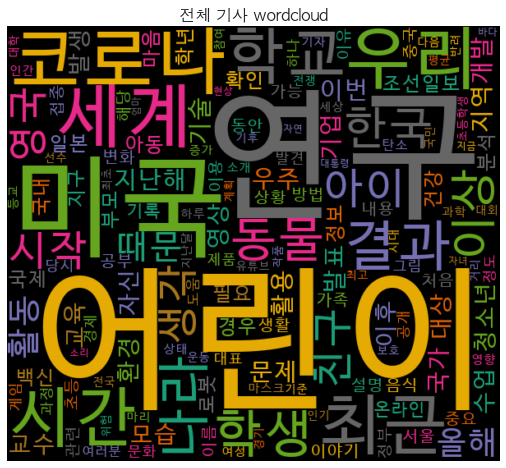

In [68]:
wordcloud(total_dtm['total_news'],'Ï†ÑÏ≤¥ Í∏∞ÏÇ¨ wordcloud')

#### N-gram
- n-gramÏùÄ nÍ∞úÏùò Ïó∞ÏÜçÏ†ÅÏù∏ Îã®Ïñ¥ ÎÇòÏó¥ÏùÑ ÏùòÎØ∏
- 1-gram : unigram
- 2-gram : bigram
- 3-gram : trigram

In [69]:
def n_grams(tokens, n):
    """
    If length of tokens less then n, return empty list
    """
    l = len(tokens)
    return [tuple(tokens[i:i + n]) for i in range(l) if i + n <= l]

In [70]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

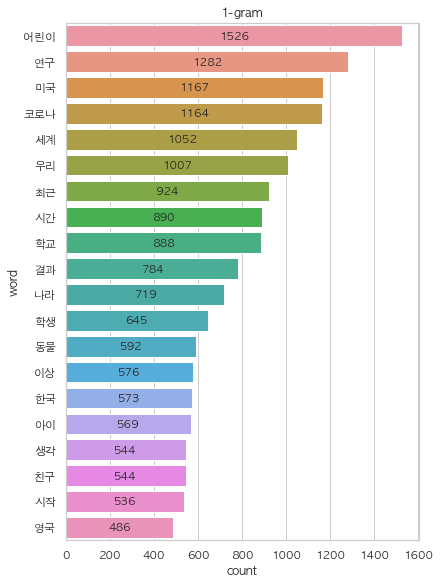

In [71]:
fig,ax=plt.subplots(1,1,figsize=(6,8),constrained_layout=True)
doc = news_df['news_article_mecab']

top_1_bigrams=get_top_ngram(doc,1)[:20]
a,b=map(list,zip(*top_1_bigrams))
word_count = pd.DataFrame({'word':a,'count':b})
sns.barplot(data= word_count,x='count',y='word').set_title('1-gram')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center',fontsize=11)

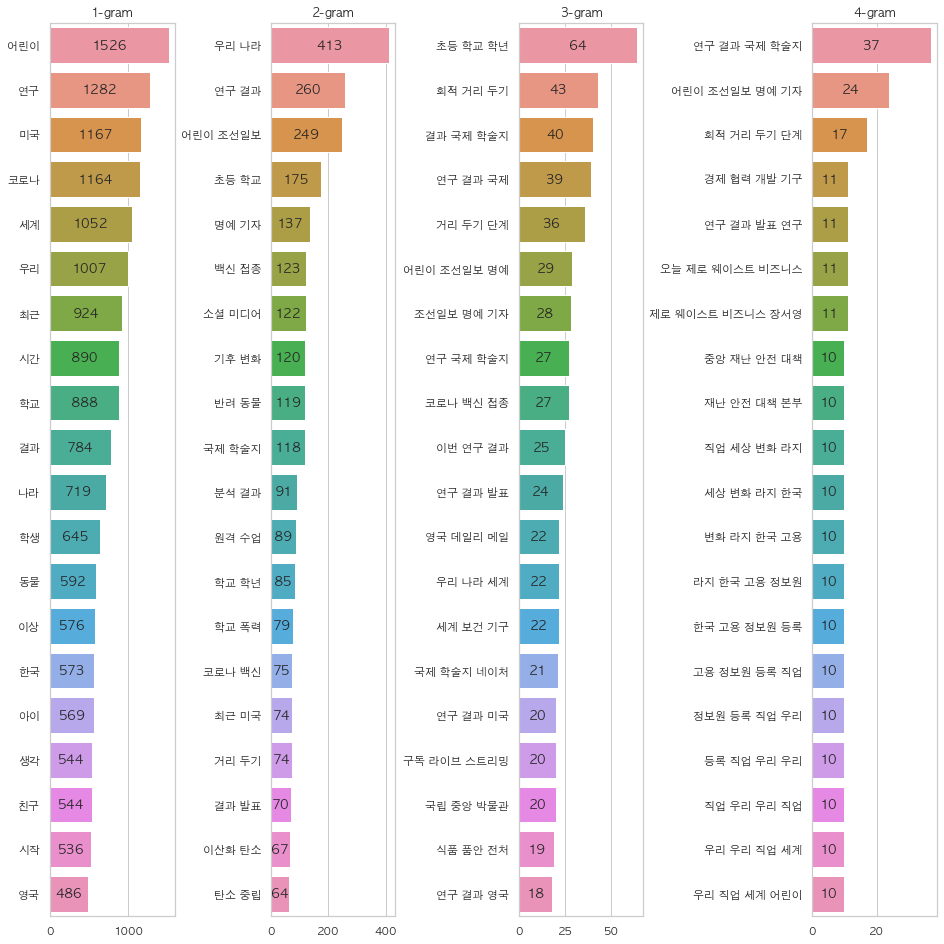

In [72]:
fig,ax=plt.subplots(1,4,figsize=(13,13),constrained_layout=True)
doc = news_df['news_article_mecab']

top_1_bigrams=get_top_ngram(doc,1)[:20]
x,y=map(list,zip(*top_1_bigrams))
word_count = pd.DataFrame({'word':x,'count':y})
sns.barplot(data= word_count,x=y,y=x,ax=ax[0]).set_title('1-gram')

top_2_bigrams=get_top_ngram(doc,2)[:20]
x,y=map(list,zip(*top_2_bigrams))
word_count = pd.DataFrame({'word':x,'count':y})
sns.barplot(data= word_count,x=y,y=x,ax=ax[1]).set_title('2-gram')

top_3_bigrams=get_top_ngram(doc,3)[:20]
x,y=map(list,zip(*top_3_bigrams))
word_count = pd.DataFrame({'word':x,'count':y})
sns.barplot(data= word_count,x=y,y=x,ax=ax[2]).set_title('3-gram')

top_4_bigrams=get_top_ngram(doc,4)[:20]
x,y=map(list,zip(*top_4_bigrams))
word_count = pd.DataFrame({'word':x,'count':y})
sns.barplot(data= word_count,x=y,y=x,ax=ax[3]).set_title('4-gram')

for i in range(len(ax)):
    for p in ax[i].patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax[i].annotate("%.0f"%(width*1), xy=(left+width/2, bottom+height/2), ha='center', va='center',fontsize=13)

### 8.2 Í∏∞ÏÇ¨ Î≥Ñ CountVectorizer ÌôïÏù∏

In [73]:
cv = CountVectorizer(analyzer='word')

count_list = cv.fit_transform(news_df['news_article_mecab'])
list_of_word = cv.get_feature_names()
text_dtm = pd.DataFrame(count_list.toarray(), columns=list_of_word)
# text_dtm.index=news_df.news_title
text_dtm.index=news_df.news_title_mecab
text_dtm.head()

Í∞ÄÍ∞Ä  Í∞ÄÍ∞ÄÎ¶∞  Í∞ÄÍ∞ê  Í∞ÄÍ∞êÏÇ∞  Í∞ÄÍ≤å  Í∞ÄÍ≤©  Í∞ÄÍ≤©ÎåÄ  Í∞ÄÍ≤©Ìëú  Í∞ÄÍ≥Ñ  Í∞ÄÍ≥ÑÎèÑ  ...  ÌûåÎëêÏä§ÌÉÑ  \
news_title_mecab                                                  ...         
Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥               0    0   0    0   0   0    0    0   0    0  ...     0   
Ïö∞ÌÅ¨Îùº Íµ≠Í≤Ω ÌÉàÏ∂ú ÏÑ∏ ÏÜåÎÖÑ        0    0   0    0   0   0    0    0   0    0  ...     0   
Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ ÎãàÏºà ÎÇ© Ïû•Ïã†Íµ¨ Ï£ºÏùò   0    0   0    0   0   0    0    0   0    0  ...     0   
ÏΩîÎ°úÎÇò ÌòàÏï°Ìòï ÏúÑÌóò ÏµúÏ†Ä         0    0   0    0   0   0    0    0   0    0  ...     0   
ÌôîÎßà Î¨∏ÌôîÏû¨ Îì± Í∑úÎ™® ÌîºÌï¥        0    0   0    0   0   0    0    0   0    0  ...     0   

                     ÌûåÏ¶à  ÌûåÌä∏  ÌûêÎùº  ÌûêÎü¨Î¶¨  ÌûêÎ¶¨Ïä§  ÌûêÎßÅ  ÌûêÏä§  ÌûòÏ§Ñ  ÌûôÌï©  
news_title_mecab                                           
Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥               0   0   0    0    0   0   0   0   0  
Ïö∞ÌÅ¨Îùº Íµ≠Í≤Ω ÌÉàÏ∂ú ÏÑ∏ ÏÜåÎÖÑ        0   0   0    0    0   0   0   0   0  
Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ ÎãàÏºà ÎÇ© Ïû•Ïã†Íµ¨ Ï£ºÏùò   0   0   0    0    0   0   0   0   0  
ÏΩîÎ°úÎÇò ÌòàÏï°Ìòï ÏúÑÌóò ÏµúÏ†Ä         0   0   0    0    0   0   0   0   0  
ÌôîÎßà Î¨∏ÌôîÏû¨ Îì± Í∑úÎ™® ÌîºÌï¥        0   0   0    0    0   0   0   0   0  

[5 rows x 18911 columns]

In [74]:
count_list.toarray().sum(axis=0)

array([3, 2, 2, ..., 2, 1, 5])

In [75]:
list_of_word[:10]

['Í∞ÄÍ∞Ä', 'Í∞ÄÍ∞ÄÎ¶∞', 'Í∞ÄÍ∞ê', 'Í∞ÄÍ∞êÏÇ∞', 'Í∞ÄÍ≤å', 'Í∞ÄÍ≤©', 'Í∞ÄÍ≤©ÎåÄ', 'Í∞ÄÍ≤©Ìëú', 'Í∞ÄÍ≥Ñ', 'Í∞ÄÍ≥ÑÎèÑ']

In [76]:
text_dtm=text_dtm.transpose()

In [77]:
text_dtm.head()

news_title_mecab  Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥  Ïö∞ÌÅ¨Îùº Íµ≠Í≤Ω ÌÉàÏ∂ú ÏÑ∏ ÏÜåÎÖÑ  Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ ÎãàÏºà ÎÇ© Ïû•Ïã†Íµ¨ Ï£ºÏùò  ÏΩîÎ°úÎÇò ÌòàÏï°Ìòï ÏúÑÌóò ÏµúÏ†Ä  \
Í∞ÄÍ∞Ä                      0               0                    0              0   
Í∞ÄÍ∞ÄÎ¶∞                     0               0                    0              0   
Í∞ÄÍ∞ê                      0               0                    0              0   
Í∞ÄÍ∞êÏÇ∞                     0               0                    0              0   
Í∞ÄÍ≤å                      0               0                    0              0   

news_title_mecab  ÌôîÎßà Î¨∏ÌôîÏû¨ Îì± Í∑úÎ™® ÌîºÌï¥  ÏÑ∏ ÏÜåÎÖÄ Ïö∞ÌÅ¨Îùº ÏπúÍµ¨ Îã§Î¶¨  Í∏∞ÏôÄÏßë Ï¥àÍ∞ÄÏßë ÎÑàÏôÄÏßë Ïò•  \
Í∞ÄÍ∞Ä                             0               0              0   
Í∞ÄÍ∞ÄÎ¶∞                            0               0              0   
Í∞ÄÍ∞ê                             0               0              0   
Í∞ÄÍ∞êÏÇ∞                            0               0              0   
Í∞ÄÍ≤å                             0               0              0   

news_title_mecab  Ï£ºÍæ∏ÎØ∏ ÎèÑÎã§Î¶¨ Î¥ÑÎßõ ÌôúÎ†• Ï∂©Ï†Ñ  ÎπôÌïòÍ∏∞ Î©∏Ï¢Ö ÎèôÎ¨º ÏïÑÎßàÏ°¥ ÏïîÍ∞ÅÌôî ÎØ∏Ïä§ÌÑ∞Î¶¨  Í≥µÎ∂Ä Í≤É Î™©Î°ù  ...  \
Í∞ÄÍ∞Ä                               0                       0        0  ...   
Í∞ÄÍ∞ÄÎ¶∞                              0                       0        0  ...   
Í∞ÄÍ∞ê                               0                       0        0  ...   
Í∞ÄÍ∞êÏÇ∞                              0                       0        0  ...   
Í∞ÄÍ≤å                               0                       0        0  ...   

news_title_mecab  Ï∞® Í±∞ Î∞îÎûå ÌÉúÌíç Îßà Ïù¥ÏÇ≠ ÏÉÅÎ•ô  ÌñÑÎ≤ÑÍ±∞ Ï†ïÌÅ¨ Ìë∏Îìú  ÎπÑÍ≤∞ ÎåÄÎ°ú Ïâº Î≤àÏãù  ÏóÑÎßà ÏïÑÎπ† Í≥µÎ∂Ä Í∂åÎ¶¨  \
Í∞ÄÍ∞Ä                                0          0           0            0   
Í∞ÄÍ∞ÄÎ¶∞                               0          0           0            0   
Í∞ÄÍ∞ê                                0          0           0            0   
Í∞ÄÍ∞êÏÇ∞                               0          0           0            0   
Í∞ÄÍ≤å                                0          0           0            0   

news_title_mecab  Ï≤≠Í∞Å Ïû•Ïï† ÏÜåÌÜµ Ìà¨Î™Ö ÎßàÏä§ÌÅ¨  ÎèºÏßÄ Îáå Ïª¥Ìì®ÌÑ∞ Ïπ© Ïó∞Í≤∞ ÏÉùÍ∞Å Í∏∞Í≥Ñ Ïàò  ÌÉëÏäπ Î°úÎ¥á ÌîÑÎ°úÏä§ ÌÖå ÏãúÏä§ Ï°∞Ï¢ÖÏÇ¨  \
Í∞ÄÍ∞Ä                              0                      0                   0   
Í∞ÄÍ∞ÄÎ¶∞                             0                      0                   0   
Í∞ÄÍ∞ê                              0                      0                   0   
Í∞ÄÍ∞êÏÇ∞                             0                      0                   0   
Í∞ÄÍ≤å                              0                      0                   0   

news_title_mecab  Î™®Ìóò Ï§ÄÎπÑ Ï±ÖÏû•  Î∞©ÌÉÑÏÜåÎÖÑÎã® Î∏îÎûô ÌïëÌÅ¨ ÏÑ∏Í≥Ñ ÏùåÏõê ÏãúÏû• Ïò¨  Ïïå ÌååÍ≥† Ïù¥ÏÑ∏Îèå Îã® Í±¥ Îî• Îü¨Îãù ÎçïÎ∂Ñ  
Í∞ÄÍ∞Ä                       0                       0                     0  
Í∞ÄÍ∞ÄÎ¶∞                      0                       0                     0  
Í∞ÄÍ∞ê                       0                       0                     0  
Í∞ÄÍ∞êÏÇ∞                      0                       0                     0  
Í∞ÄÍ≤å                       0                       0                     0  

[5 rows x 1527 columns]

In [78]:
for index,text in enumerate(text_dtm.columns[0:10]):
    news_rank_dict = text_dtm[text].sort_values(ascending=False)[:3].to_dict()
    print(text,news_rank_dict,sep='\n',end='\n----------\n')

Îü¨ÏãúÏïÑ Í≥†ÏñëÏù¥
{'Í≥†ÏñëÏù¥': 9, 'Îü¨ÏãúÏïÑ': 7, 'ÎåÄÌöå': 4}
----------
Ïö∞ÌÅ¨Îùº Íµ≠Í≤Ω ÌÉàÏ∂ú ÏÑ∏ ÏÜåÎÖÑ
{'ÏÜåÎÖÑ': 4, 'Ïä¨Î°úÎ∞îÌÇ§ÏïÑ': 3, 'Ïö∞ÌÅ¨Îùº': 3}
----------
Ïò®ÎùºÏù∏ ÏáºÌïëÎ™∞ ÎãàÏºà ÎÇ© Ïû•Ïã†Íµ¨ Ï£ºÏùò
{'Ï†úÌíà': 4, 'ÎãàÏºà': 4, 'ÏïàÏ†Ñ': 3}
----------
ÏΩîÎ°úÎÇò ÌòàÏï°Ìòï ÏúÑÌóò ÏµúÏ†Ä
{'Ïó∞Íµ¨': 6, 'ÌòàÏï°Ìòï': 5, 'ÏΩîÎ°úÎÇò': 5}
----------
ÌôîÎßà Î¨∏ÌôîÏû¨ Îì± Í∑úÎ™® ÌîºÌï¥
{'ÏÇ∞Î∂à': 5, 'ÌîºÌï¥': 5, 'ÏßÄÏó≠': 3}
----------
ÏÑ∏ ÏÜåÎÖÄ Ïö∞ÌÅ¨Îùº ÏπúÍµ¨ Îã§Î¶¨
{'Î°úÏ¶à': 4, 'ÏïÑÎ∞î': 4, 'Ï±åÎ¶∞ÏßÄ': 3}
----------
Í∏∞ÏôÄÏßë Ï¥àÍ∞ÄÏßë ÎÑàÏôÄÏßë Ïò•
{'ÏßÄÎ∂ï': 10, 'Í∏∞ÏôÄÏßë': 7, 'Î≥èÏßö': 5}
----------
Ï£ºÍæ∏ÎØ∏ ÎèÑÎã§Î¶¨ Î¥ÑÎßõ ÌôúÎ†• Ï∂©Ï†Ñ
{'Ï£ºÍæ∏ÎØ∏': 7, 'ÎèÑÎã§Î¶¨': 3, 'Î¥ÑÏ≤†': 2}
----------
ÎπôÌïòÍ∏∞ Î©∏Ï¢Ö ÎèôÎ¨º ÏïÑÎßàÏ°¥ ÏïîÍ∞ÅÌôî ÎØ∏Ïä§ÌÑ∞Î¶¨
{'ÎèôÎ¨º': 3, 'ÏïîÍ∞ÅÌôî': 3, 'ÏóëÏÑúÌÑ∞': 2}
----------
Í≥µÎ∂Ä Í≤É Î™©Î°ù
{'ÏïÑÏù¥': 4, 'Í≥µÎ∂Ä': 4, 'ÏóÑÎßà': 3}
----------


In [79]:
news_df.news_article[5]

'Ïó¨Îçü ÏÇ¥ÏßúÎ¶¨ ÏÜåÎÖÄÍ∞Ä Îü¨ÏãúÏïÑÏùò Ïπ®Í≥µÏúºÎ°ú ÌîºÌï¥Î•º ÏûÖÏùÄ Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò Ïñ¥Î¶∞Ïù¥Îì§ÏùÑ ÏúÑÌï¥ Îëê ÌåîÏùÑ Í±∑Ïñ¥Î∂ôÏù¥Í≥† ÎÇòÏÑ∞Îã§. 6Ïùº ÏòÅÍµ≠ bbcÏóê Îî∞Î•¥Î©¥ ÎßÅÏª®ÏÖîÏ£ºÏóê Îäî ÏïÑÎ∞î Î°úÏ¶à ÌÅ¥ÎùºÌÅ¨Îäî Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò ÏπúÍµ¨Î•º ÎèïÍ∏∞ ÏúÑÌï¥ 4ÏãúÍ∞Ñ Ï±åÎ¶∞ÏßÄÎ•º ÏãúÏûëÌñàÎã§. Ïù¥ ÎèÑÏ†ÑÏùÄ ÏöîÌÅ¨ÏÖîÏ£ºÏôÄ ÎßÅÏª®ÏÖîÏ£ºÎ•º ÏûáÎäî Ï†ÑÏ≤¥ Í∏∏Ïù¥ 20ÎßàÏùº Í∑úÎ™®Ïùò ÌóòÎ≤Ñ ÎåÄÍµêÎ•º ÏûêÏ†ÑÍ±∞Î°ú Í±¥ÎÑàÎäî Í≤É. ÎèÑÏ†Ñ Ï≤´ÎÇ†Ïù¥ÏóàÎçò ÏßÄÎÇú 5Ïùº ÏïÑÎ∞î Î°úÏ¶àÎäî ÌóòÎ≤Ñ ÎåÄÍµêÏùò 6ÎßàÏùºÏùÑ Ìö°Îã®ÌïòÎäî Îç∞ ÏÑ±Í≥µÌñàÎã§. Í∑∏Îäî Ïö∞ÌÅ¨ÎùºÏù¥ÎÇò Ïñ¥Î¶∞Ïù¥Îì§Ïù¥ ÌèâÏÜå Í∞ÄÏßÄÍ≥† ÎÜÄÎçò Ïû•ÎÇúÍ∞êÍ≥º Î¨ºÍ±¥ÏùÑ Î≤ÑÎ¶¨Í≥† ÌîºÎûÄÌïòÎäî Î™®ÏäµÏùÑ Î≥¥Î©∞ ÎèÑÏõÄÏùÑ Ï§Ñ Î∞©Î≤ïÏùÑ Í≥†ÎØºÌïòÎçò Ï§ë Ï±åÎ¶∞ÏßÄÎ•º ÏÉùÍ∞ÅÌï¥ÎÉàÎã§Í≥† ÎßêÌñàÎã§. Ïú†ÎãàÏÑ∏ÌîÑÎ•º ÌÜµÌï¥ 1000ÌååÏö¥ÎìúÎ•º Î™©ÌëúÎ°ú ÏãúÏûëÌïú ÏïÑÎ∞î Î°úÏ¶àÏùò Î™®Í∏à Ï±åÎ¶∞ÏßÄ ÎàÑÏ†Å Í∏àÏï°ÏùÄ 7Ïùº Í∏∞Ï§Ä 1065ÌååÏö¥ÎìúÎ•º ÎÑòÍ≤ºÎã§. ÌóòÎ≤Ñ ÎåÄÍµêÎ•º Í±¥ÎÑàÎäî ÏïÑÎ∞î Î°úÏ¶àÏùò Î™®ÏäµÏùÑ ÏÉÅÏÉÅÌï¥ÏÑú Í∑∏Î†§Ï£ºÏÑ∏Ïöî.'

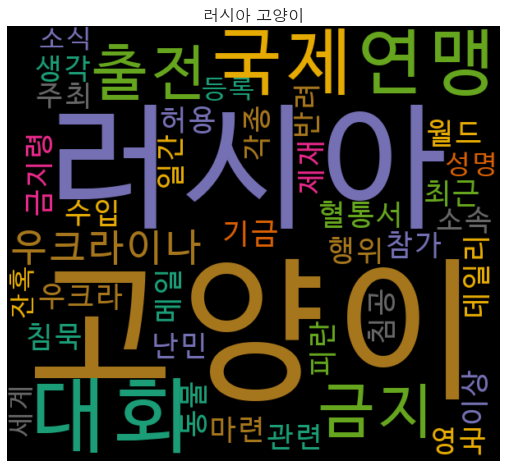

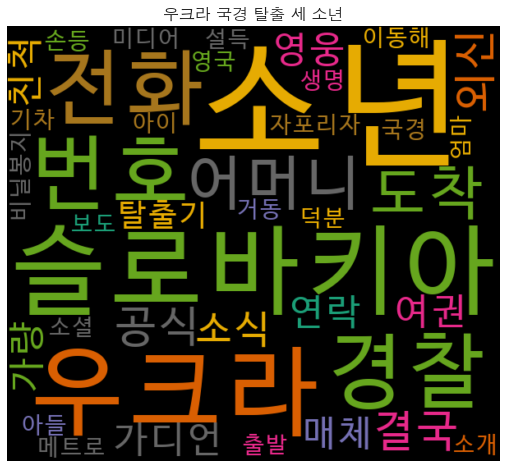

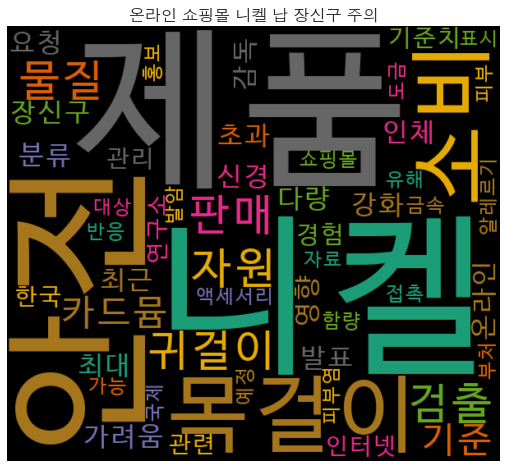

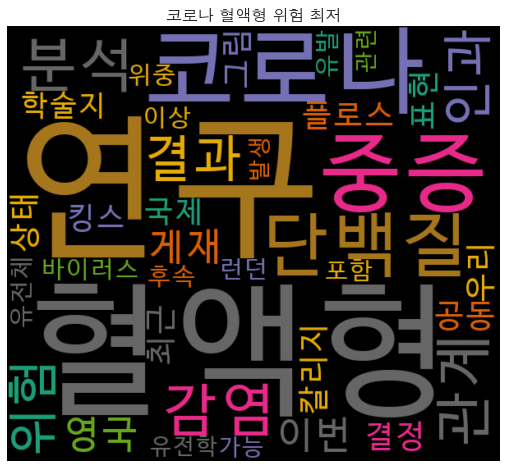

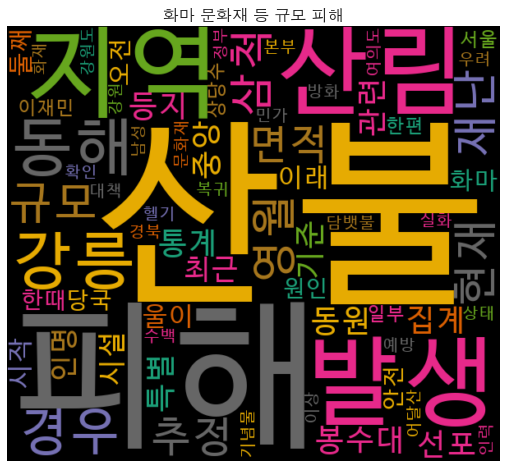

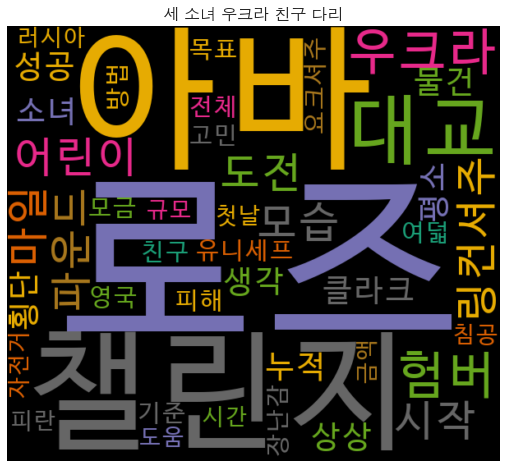

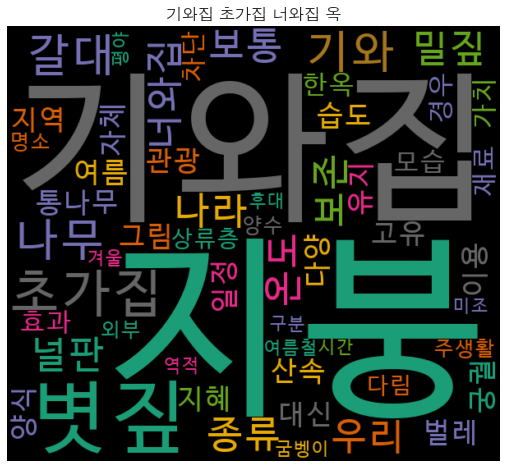

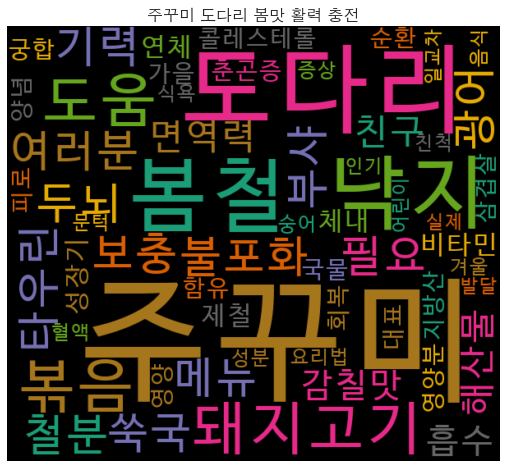

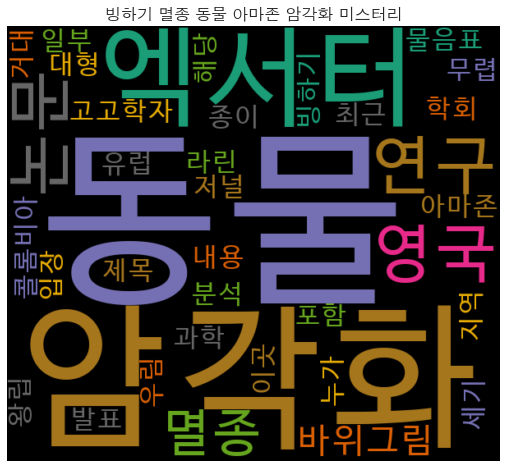

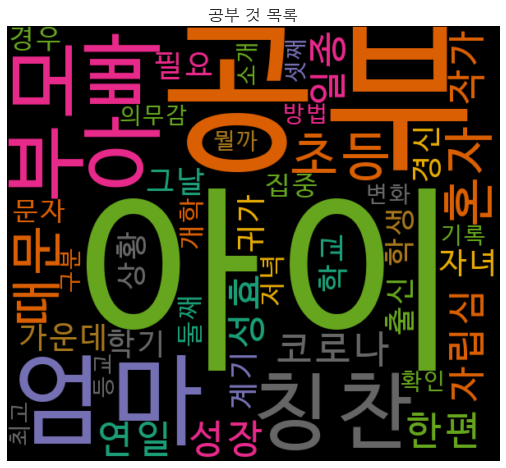

In [80]:
for index,text in enumerate(text_dtm.columns[0:10]):
    wordcloud(text_dtm[text].sort_values(ascending=False),text)